In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot
from matplotlib.pyplot import *
import math

**A system with high precision but low recall returns very few results, but most of them are correct**

In [2]:
metrics600=pd.read_csv('metrics_MH600AND200.csv')

In [3]:
metrics600.columns

Index(['#songs', '#MHfuncs', '#LSHfuncs', 'band', 'mMH', 'mLSH', 'pMH', 'TP',
       'TN', 'FP', 'FN', 'LSH_Accuracy', 'LSH_Precision', 'LSH_Recall',
       'LSH_F1', 'MH_Accuracy', 'MH_Precision', 'MH_Recall', 'MH_F1',
       'threshold'],
      dtype='object')

In [4]:
df=metrics600[['#MHfuncs', '#LSHfuncs', 'band', 'TP','TN', 'FP', 'FN', 'LSH_Accuracy', 'LSH_Precision', 
 'LSH_Recall','LSH_F1','threshold']]
df

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
0,600,1,300,120396,80533,17,298554,0.402260,0.999859,0.287376,0.446438,0.058
1,600,1,300,130299,80057,2,289142,0.421133,0.999985,0.310649,0.474037,0.058
2,600,1,300,130662,81066,50,287722,0.423880,0.999617,0.312302,0.475917,0.058
3,600,1,300,121538,79094,3,298865,0.401666,0.999975,0.289099,0.448526,0.058
4,600,1,300,134453,79947,20,285080,0.429229,0.999851,0.320483,0.485385,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...
135,200,5,100,325793,118251,31835,23621,0.888977,0.910983,0.932398,0.921566,0.100
136,200,5,100,328001,113682,36205,21612,0.884250,0.900592,0.938183,0.919003,0.100
137,200,5,100,335416,106578,41134,16372,0.884873,0.890761,0.953461,0.921045,0.100
138,200,5,100,341283,104902,31200,22115,0.893263,0.916238,0.939144,0.927549,0.100


In [5]:
df.columns

Index(['#MHfuncs', '#LSHfuncs', 'band', 'TP', 'TN', 'FP', 'FN', 'LSH_Accuracy',
       'LSH_Precision', 'LSH_Recall', 'LSH_F1', 'threshold'],
      dtype='object')

In [6]:
df['band'].unique()

array([300, 200, 150, 100,  50,  30,  10,  20], dtype=int64)

In [7]:
df['#LSHfuncs'].unique()

array([1, 3, 5], dtype=int64)

In [8]:
df['#MHfuncs'].unique()

array([600, 200], dtype=int64)

## MH 600

In [9]:
## MH and num LSH trade off accuracy precsion recall f1  for 600 bands
MH600=df[df['#MHfuncs'].eq(600)]

In [10]:
## MH and num LSH trade off accuracy precsion recall f1  for 600 bands 
## LSH functions =1 MH600
MH600LS1=MH600[MH600['#LSHfuncs'].eq(1)]
MH600LS1['band'].unique()

array([300, 200, 150, 100,  50,  30], dtype=int64)

## MH 600 LSH 1

In [11]:
MH600LS1_B300=MH600LS1[MH600LS1.band.eq(300)]
MH600LS1_B300

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
0,600,1,300,120396,80533,17,298554,0.402260,0.999859,0.287376,0.446438,0.058
1,600,1,300,130299,80057,2,289142,0.421133,0.999985,0.310649,0.474037,0.058
2,600,1,300,130662,81066,50,287722,0.423880,0.999617,0.312302,0.475917,0.058
3,600,1,300,121538,79094,3,298865,0.401666,0.999975,0.289099,0.448526,0.058
4,600,1,300,134453,79947,20,285080,0.429229,0.999851,0.320483,0.485385,0.058


In [12]:
#mean and standard error for MH600 B300 LSH1
x=5
import statistics

MH600MeanAcc300=round(MH600LS1_B300.LSH_Accuracy.mean(), 2)
MH600MeanPrec300=round(MH600LS1_B300.LSH_Precision.mean(),2)
MH600MeanRec300=round(MH600LS1_B300.LSH_Recall.mean(),2)
MH600MeanF300=round(MH600LS1_B300.LSH_F1.mean(),2)
MH600MeanTP300=round(MH600LS1_B300.TP.mean(),2)
MH600MeanTN300=round(MH600LS1_B300.TN.mean(),2)
MH600MeanFP300=round(MH600LS1_B300.FP.mean(),2)
MH600MeanFN300=round(MH600LS1_B300.FN.mean(),2)
MH600Acc300Error=round(statistics.stdev(MH600LS1_B300.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec300Error=round(statistics.stdev(MH600LS1_B300.LSH_Precision)/math.sqrt(x),3)
MH600Rec300Error=round(statistics.stdev(MH600LS1_B300.LSH_Recall)/math.sqrt(x),3)
MH600F300Error=round(statistics.stdev(MH600LS1_B300.LSH_F1)/math.sqrt(x),3)
MH600TP300Error=round(statistics.stdev(MH600LS1_B300.TP)/math.sqrt(x),3)
MH600TN300Error=round(statistics.stdev(MH600LS1_B300.TN)/math.sqrt(x),3)
MH600FP300Error=round(statistics.stdev(MH600LS1_B300.FP)/math.sqrt(x),3)
MH600FN300Error=round(statistics.stdev(MH600LS1_B300.FN)/math.sqrt(x),3)

res600LSH1B300={'MH':600, 
            'LSH': 1,
            'band':300,
            'TP_mean': MH600MeanTP300,
            'TP_1SE': MH600TP300Error,
            'TN_mean':MH600MeanTN300,
            'TN_1SE':MH600TN300Error,
            'FP_mean':MH600MeanFP300,
            'FP_1SE': MH600FP300Error,
            'FN_mean':MH600MeanFN300,
            'FN_1SE': MH600FN300Error,
            'Accuracy_mean':MH600MeanAcc300,
            'Acc_1SE':MH600Acc300Error,
            'Precision_mean':MH600MeanPrec300,
            'Prec_1SE':MH600Prec300Error,
            'Recall_mean':MH600MeanRec300,
            'Recall_1SE':MH600Rec300Error,
            'F1_mean':MH600MeanF300,
            'F1_1SE': MH600F300Error, 
            'SIM_t':MH600LS1_B300['threshold'].iloc[0]}

res600LSH1B300_pandas=pd.DataFrame(res600LSH1B300, index=[0])
res600LSH1B300_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.6,2758.482,80139.4,327.885,18.4,8.687,291872.6,2866.687,0.42,0.006,1.0,0.0,0.3,0.007,0.47,0.008,0.058


In [13]:
#MH600 Bands200 LSH1
MH600LS1_B200=MH600LS1[MH600LS1.band.eq(200)]
MH600LS1_B200

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
5,600,1,200,2030,270583,0,226887,0.545772,1.000000,0.008868,0.017580,0.171
6,600,1,200,2275,266642,1,230582,0.538372,0.999561,0.009770,0.019351,0.171
7,600,1,200,2294,262955,0,234251,0.531029,1.000000,0.009698,0.019210,0.171
8,600,1,200,2815,267556,0,229129,0.541283,1.000000,0.012137,0.023982,0.171
9,600,1,200,2841,261239,0,235420,0.528689,1.000000,0.011924,0.023567,0.171


In [14]:
x=5
MH600MeanAcc200=round(MH600LS1_B200.LSH_Accuracy.mean(), 2)
MH600MeanPrec200=round(MH600LS1_B200.LSH_Precision.mean(),2)
MH600MeanRec200=round(MH600LS1_B200.LSH_Recall.mean(),6)
MH600MeanF200=round(MH600LS1_B200.LSH_F1.mean(),6)
MH600MeanTP200=round(MH600LS1_B200.TP.mean(),2)
MH600MeanTN200=round(MH600LS1_B200.TN.mean(),2)
MH600MeanFP200=round(MH600LS1_B200.FP.mean(),2)
MH600MeanFN200=round(MH600LS1_B200.FN.mean(),2)
MH600Acc200Error=round(statistics.stdev(MH600LS1_B200.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec200Error=round(statistics.stdev(MH600LS1_B200.LSH_Precision)/math.sqrt(x),3)
MH600Rec200Error=round(statistics.stdev(MH600LS1_B200.LSH_Recall)/math.sqrt(x),6)
MH600F200Error=round(statistics.stdev(MH600LS1_B200.LSH_F1)/math.sqrt(x),6)
MH600TP200Error=round(statistics.stdev(MH600LS1_B200.TP)/math.sqrt(x),3)
MH600TN200Error=round(statistics.stdev(MH600LS1_B200.TN)/math.sqrt(x),3)
MH600FP200Error=round(statistics.stdev(MH600LS1_B200.FP)/math.sqrt(x),3)
MH600FN200Error=round(statistics.stdev(MH600LS1_B200.FN)/math.sqrt(x),3)

res600LSH1B200={'MH':600, 
            'LSH': 1,
            'band':200,
            'TP_mean': MH600MeanTP200,
            'TP_1SE': MH600TP200Error,
            'TN_mean':MH600MeanTN200,
            'TN_1SE':MH600TN200Error,
            'FP_mean':MH600MeanFP200,
            'FP_1SE': MH600FP200Error,
            'FN_mean':MH600MeanFN200,
            'FN_1SE': MH600FN200Error,
            'Accuracy_mean':MH600MeanAcc200,
            'Acc_1SE':MH600Acc200Error,
            'Precision_mean':MH600MeanPrec200,
            'Prec_1SE':MH600Prec200Error,
            'Recall_mean':MH600MeanRec200,
            'Recall_1SE':MH600Rec200Error,
            'F1_mean':MH600MeanF200,
            'F1_1SE': MH600F200Error,
            'SIM_t':MH600LS1_B200['threshold'].iloc[0]}
res600LSH1B200_pandas=pd.DataFrame(res600LSH1B200, index=[0])
res600LSH1B200_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,200,2451.0,160.851,265795.0,1666.826,0.2,0.2,231253.8,1587.064,0.54,0.003,1.0,0.0,0.010479,0.000654,0.020738,0.00128,0.171


In [15]:
#MH600 BANDS150 LSH1
MH600LS1_B150=MH600LS1[MH600LS1.band.eq(150)]
MH600LS1_B150

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
10,600,1,150,67,413759,0,85674,0.828480,1.0,0.000781,0.001562,0.286
11,600,1,150,68,410724,0,88708,0.822406,1.0,0.000766,0.001531,0.286
12,600,1,150,69,414172,0,85259,0.829311,1.0,0.000809,0.001616,0.286
13,600,1,150,83,419128,0,80289,0.839261,1.0,0.001033,0.002063,0.286
14,600,1,150,102,414385,0,85013,0.829804,1.0,0.001198,0.002394,0.286


In [16]:
x=5
MH600MeanAcc150=round(MH600LS1_B150.LSH_Accuracy.mean(), 2)
MH600MeanPrec150=round(MH600LS1_B150.LSH_Precision.mean(),2)
MH600MeanRec150=round(MH600LS1_B150.LSH_Recall.mean(),6)
MH600MeanF150=round(MH600LS1_B150.LSH_F1.mean(),6)
MH600MeanTP150=round(MH600LS1_B150.TP.mean(),2)
MH600MeanTN150=round(MH600LS1_B150.TN.mean(),2)
MH600MeanFP150=round(MH600LS1_B150.FP.mean(),2)
MH600MeanFN150=round(MH600LS1_B150.FN.mean(),2)
MH600Acc150Error=round(statistics.stdev(MH600LS1_B150.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec150Error=round(statistics.stdev(MH600LS1_B150.LSH_Precision)/math.sqrt(x),3)
MH600Rec150Error=round(statistics.stdev(MH600LS1_B150.LSH_Recall)/math.sqrt(x),6)
MH600F150Error=round(statistics.stdev(MH600LS1_B150.LSH_F1)/math.sqrt(x),6)
MH600TP150Error=round(statistics.stdev(MH600LS1_B150.TP)/math.sqrt(x),3)
MH600TN150Error=round(statistics.stdev(MH600LS1_B150.TN)/math.sqrt(x),3)
MH600FP150Error=round(statistics.stdev(MH600LS1_B150.FP)/math.sqrt(x),3)
MH600FN150Error=round(statistics.stdev(MH600LS1_B150.FN)/math.sqrt(x),3)

res600LSH1B150={'MH':600, 
            'LSH': 1,
            'band':150,
            'TP_mean': MH600MeanTP150,
            'TP_1SE': MH600TP150Error,
            'TN_mean':MH600MeanTN150,
            'TN_1SE':MH600TN150Error,
            'FP_mean':MH600MeanFP150,
            'FP_1SE': MH600FP150Error,
            'FN_mean':MH600MeanFN150,
            'FN_1SE': MH600FN150Error,
            'Accuracy_mean':MH600MeanAcc150,
            'Acc_1SE':MH600Acc150Error,
            'Precision_mean':MH600MeanPrec150,
            'Prec_1SE':MH600Prec150Error,
            'Recall_mean':MH600MeanRec150,
            'Recall_1SE':MH600Rec150Error,
            'F1_mean':MH600MeanF150,
            'F1_1SE': MH600F150Error,
            'SIM_t':MH600LS1_B150['threshold'].iloc[0]}
res600LSH1B150_pandas=pd.DataFrame(res600LSH1B150, index=[0])
res600LSH1B150_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,150,77.8,6.719,414433.6,1347.672,0.0,0.0,84988.6,1350.253,0.83,0.003,1.0,0.0,0.000917,0.000085,0.001833,0.00017,0.286


In [17]:
#MH600 BANDS100 LSH1
MH600LS1_B100=MH600LS1[MH600LS1.band.eq(100)]
MH600LS1_B100

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
15,600,1,100,2,489876,0,9622,0.980737,1.0,0.000208,0.000416,0.464
16,600,1,100,2,491611,0,7887,0.984210,1.0,0.000254,0.000507,0.464
17,600,1,100,2,490878,0,8620,0.982743,1.0,0.000232,0.000464,0.464
18,600,1,100,2,490932,0,8566,0.982851,1.0,0.000233,0.000467,0.464
19,600,1,100,3,490764,0,8733,0.982517,1.0,0.000343,0.000687,0.464


In [18]:
x=5
MH600MeanAcc100=round(MH600LS1_B100.LSH_Accuracy.mean(), 2)
MH600MeanPrec100=round(MH600LS1_B100.LSH_Precision.mean(),2)
MH600MeanRec100=round(MH600LS1_B100.LSH_Recall.mean(),6)
MH600MeanF100=round(MH600LS1_B100.LSH_F1.mean(),6)
MH600MeanTP100=round(MH600LS1_B100.TP.mean(),2)
MH600MeanTN100=round(MH600LS1_B100.TN.mean(),2)
MH600MeanFP100=round(MH600LS1_B100.FP.mean(),2)
MH600MeanFN100=round(MH600LS1_B100.FN.mean(),2)
MH600Acc100Error=round(statistics.stdev(MH600LS1_B100.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec100Error=round(statistics.stdev(MH600LS1_B100.LSH_Precision)/math.sqrt(x),3)
MH600Rec100Error=round(statistics.stdev(MH600LS1_B100.LSH_Recall)/math.sqrt(x),6)
MH600F100Error=round(statistics.stdev(MH600LS1_B100.LSH_F1)/math.sqrt(x),6)
MH600TP100Error=round(statistics.stdev(MH600LS1_B100.TP)/math.sqrt(x),3)
MH600TN100Error=round(statistics.stdev(MH600LS1_B100.TN)/math.sqrt(x),3)
MH600FP100Error=round(statistics.stdev(MH600LS1_B100.FP)/math.sqrt(x),3)
MH600FN100Error=round(statistics.stdev(MH600LS1_B100.FN)/math.sqrt(x),3)

res600LSH1B100={'MH':600, 
            'LSH': 1,
            'band':100,
            'TP_mean': MH600MeanTP100,
            'TP_1SE': MH600TP100Error,
            'TN_mean':MH600MeanTN100,
            'TN_1SE':MH600TN100Error,
            'FP_mean':MH600MeanFP100,
            'FP_1SE': MH600FP100Error,
            'FN_mean':MH600MeanFN100,
            'FN_1SE': MH600FN100Error,
            'Accuracy_mean':MH600MeanAcc100,
            'Acc_1SE':MH600Acc100Error,
            'Precision_mean':MH600MeanPrec100,
            'Prec_1SE':MH600Prec100Error,
            'Recall_mean':MH600MeanRec100,
            'Recall_1SE':MH600Rec100Error,
            'F1_mean':MH600MeanF100,
            'F1_1SE': MH600F100Error,
            'SIM_t':MH600LS1_B100['threshold'].iloc[0]}
res600LSH1B100_pandas=pd.DataFrame(res600LSH1B100, index=[0])
res600LSH1B100_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,100,2.2,0.2,490812.2,277.088,0.0,0.0,8685.6,277.08,0.98,0.001,1.0,0.0,0.000254,0.000023,0.000508,0.000047,0.464


In [19]:
#MH600 bands50 LSH1
MH600LS1_B50=MH600LS1[MH600LS1.band.eq(50)]
MH600LS1_B50

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
20,600,1,50,2,499403,0,95,0.999810,1.0,0.020619,0.040404,0.722
21,600,1,50,2,499407,0,91,0.999818,1.0,0.021505,0.042105,0.722
22,600,1,50,2,499411,0,87,0.999826,1.0,0.022472,0.043956,0.722
23,600,1,50,2,499405,0,93,0.999814,1.0,0.021053,0.041237,0.722
24,600,1,50,2,499412,0,86,0.999828,1.0,0.022727,0.044444,0.722


In [20]:
x=5
MH600MeanAcc50=round(MH600LS1_B50.LSH_Accuracy.mean(), 2)
MH600MeanPrec50=round(MH600LS1_B50.LSH_Precision.mean(),2)
MH600MeanRec50=round(MH600LS1_B50.LSH_Recall.mean(),6)
MH600MeanF50=round(MH600LS1_B50.LSH_F1.mean(),6)
MH600MeanTP50=round(MH600LS1_B50.TP.mean(),2)
MH600MeanTN50=round(MH600LS1_B50.TN.mean(),2)
MH600MeanFP50=round(MH600LS1_B50.FP.mean(),2)
MH600MeanFN50=round(MH600LS1_B50.FN.mean(),2)
MH600Acc50Error=round(statistics.stdev(MH600LS1_B50.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec50Error=round(statistics.stdev(MH600LS1_B50.LSH_Precision)/math.sqrt(x),3)
MH600Rec50Error=round(statistics.stdev(MH600LS1_B50.LSH_Recall)/math.sqrt(x),6)
MH600F50Error=round(statistics.stdev(MH600LS1_B50.LSH_F1)/math.sqrt(x),6)
MH600TP50Error=round(statistics.stdev(MH600LS1_B50.TP)/math.sqrt(x),3)
MH600TN50Error=round(statistics.stdev(MH600LS1_B50.TN)/math.sqrt(x),3)
MH600FP50Error=round(statistics.stdev(MH600LS1_B50.FP)/math.sqrt(x),3)
MH600FN50Error=round(statistics.stdev(MH600LS1_B50.FN)/math.sqrt(x),3)

res600LSH1B50={'MH':600, 
            'LSH': 1,
            'band':50,
            'TP_mean': MH600MeanTP50,
            'TP_1SE': MH600TP50Error,
            'TN_mean':MH600MeanTN50,
            'TN_1SE':MH600TN50Error,
            'FP_mean':MH600MeanFP50,
            'FP_1SE': MH600FP50Error,
            'FN_mean':MH600MeanFN50,
            'FN_1SE': MH600FN50Error,
            'Accuracy_mean':MH600MeanAcc50,
            'Acc_1SE':MH600Acc50Error,
            'Precision_mean':MH600MeanPrec50,
            'Prec_1SE':MH600Prec50Error,
            'Recall_mean':MH600MeanRec50,
            'Recall_1SE':MH600Rec50Error,
            'F1_mean':MH600MeanF50,
            'F1_1SE': MH600F50Error,
            'SIM_t':MH600LS1_B50['threshold'].iloc[0]}
              
res600LSH1B50_pandas=pd.DataFrame(res600LSH1B50, index=[0])
res600LSH1B50_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,50,2.0,0.0,499407.6,1.72,0.0,0.0,90.4,1.72,1.0,0.0,1.0,0.0,0.021675,0.000405,0.042429,0.000775,0.722


In [21]:
#MH600 Bands30 LSH1
MH600LS1_B30=MH600LS1[MH600LS1.band.eq(30)]
MH600LS1_B30

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
25,600,1,30,2,499492,0,6,0.999988,1.0,0.250000,0.400000,0.844
26,600,1,30,2,499494,0,4,0.999992,1.0,0.333333,0.500000,0.844
27,600,1,30,2,499493,0,5,0.999990,1.0,0.285714,0.444444,0.844
28,600,1,30,2,499495,0,3,0.999994,1.0,0.400000,0.571429,0.844


In [22]:
x=4
MH600MeanAcc30=round(MH600LS1_B30.LSH_Accuracy.mean(), 2)
MH600MeanPrec30=round(MH600LS1_B30.LSH_Precision.mean(),2)
MH600MeanRec30=round(MH600LS1_B30.LSH_Recall.mean(),2)
MH600MeanF30=round(MH600LS1_B30.LSH_F1.mean(),2)
MH600MeanTP30=round(MH600LS1_B30.TP.mean(),2)
MH600MeanTN30=round(MH600LS1_B30.TN.mean(),2)
MH600MeanFP30=round(MH600LS1_B30.FP.mean(),2)
MH600MeanFN30=round(MH600LS1_B30.FN.mean(),2)
MH600Acc30Error=round(statistics.stdev(MH600LS1_B30.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec30Error=round(statistics.stdev(MH600LS1_B30.LSH_Precision)/math.sqrt(x),3)
MH600Rec30Error=round(statistics.stdev(MH600LS1_B30.LSH_Recall)/math.sqrt(x),3)
MH600F30Error=round(statistics.stdev(MH600LS1_B30.LSH_F1)/math.sqrt(x),3)
MH600TP30Error=round(statistics.stdev(MH600LS1_B30.TP)/math.sqrt(x),3)
MH600TN30Error=round(statistics.stdev(MH600LS1_B30.TN)/math.sqrt(x),3)
MH600FP30Error=round(statistics.stdev(MH600LS1_B30.FP)/math.sqrt(x),3)
MH600FN30Error=round(statistics.stdev(MH600LS1_B30.FN)/math.sqrt(x),3)

res600LSH1B30={'MH':600, 
            'LSH': 1,
            'band':30,
            'TP_mean': MH600MeanTP30,
            'TP_1SE': MH600TP30Error,
            'TN_mean':MH600MeanTN30,
            'TN_1SE':MH600TN30Error,
            'FP_mean':MH600MeanFP30,
            'FP_1SE': MH600FP30Error,
            'FN_mean':MH600MeanFN30,
            'FN_1SE': MH600FN30Error,
            'Accuracy_mean':MH600MeanAcc30,
            'Acc_1SE':MH600Acc30Error,
            'Precision_mean':MH600MeanPrec30,
            'Prec_1SE':MH600Prec30Error,
            'Recall_mean':MH600MeanRec30,
            'Recall_1SE':MH600Rec30Error,
            'F1_mean':MH600MeanF30,
            'F1_1SE': MH600F30Error,
            'SIM_t':MH600LS1_B30['threshold'].iloc[0]}
res600LSH1B30_pandas=pd.DataFrame(res600LSH1B30, index=[0])
res600LSH1B30_pandas




,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,30,2.0,0.0,499493.5,0.645,0.0,0.0,4.5,0.645,1.0,0.0,1.0,0.0,0.32,0.032,0.48,0.037,0.844


In [23]:
res600LSH1=pd.concat([res600LSH1B300_pandas, res600LSH1B200_pandas, res600LSH1B150_pandas, res600LSH1B100_pandas, res600LSH1B50_pandas, res600LSH1B30_pandas], ignore_index=True)

In [24]:
res600LSH1

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.6,2758.482,80139.4,327.885,18.4,8.687,291872.6,2866.687,0.42,0.006,1.0,0.0,0.300000,0.007000,0.470000,0.008000,0.058
1,600,1,200,2451.0,160.851,265795.0,1666.826,0.2,0.200,231253.8,1587.064,0.54,0.003,1.0,0.0,0.010479,0.000654,0.020738,0.001280,0.171
2,600,1,150,77.8,6.719,414433.6,1347.672,0.0,0.000,84988.6,1350.253,0.83,0.003,1.0,0.0,0.000917,0.000085,0.001833,0.000170,0.286
3,600,1,100,2.2,0.200,490812.2,277.088,0.0,0.000,8685.6,277.080,0.98,0.001,1.0,0.0,0.000254,0.000023,0.000508,0.000047,0.464
4,600,1,50,2.0,0.000,499407.6,1.720,0.0,0.000,90.4,1.720,1.00,0.000,1.0,0.0,0.021675,0.000405,0.042429,0.000775,0.722
5,600,1,30,2.0,0.000,499493.5,0.645,0.0,0.000,4.5,0.645,1.00,0.000,1.0,0.0,0.320000,0.032000,0.480000,0.037000,0.844


In [25]:
#res600LSH1.to_csv('MH600LSH1ERROR.csv')

## MH: 600 and LSH:3

In [26]:
## LSH functions =3 MH600
metrics600=pd.read_csv('metrics_MH600AND200.csv')
MH600=metrics600[metrics600['#MHfuncs'].eq(600)]
MH600LS3=MH600[MH600['#LSHfuncs'].eq(3)]
MH600LS3['band'].unique()

array([ 30,  50, 100, 150, 200, 300], dtype=int64)

In [27]:
MH600LS3    #######

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
29,1000,600,3,30,20117,20117,338563,2,499495,0,3,0.999994,1.000000,0.400000,0.571429,1.000000,1.000000,1.000000,1.000000,0.844
30,1000,600,3,30,20117,20117,338563,2,499493,0,5,0.999990,1.000000,0.285714,0.444444,0.999996,0.714286,1.000000,0.833333,0.844
31,1000,600,3,30,20117,20117,338563,2,499493,0,5,0.999990,1.000000,0.285714,0.444444,0.999996,0.714286,1.000000,0.833333,0.844
32,1000,600,3,30,20117,20117,338563,2,499494,0,4,0.999992,1.000000,0.333333,0.500000,0.999998,0.833333,1.000000,0.909091,0.844
33,1000,600,3,30,20117,20117,338563,2,499493,0,5,0.999990,1.000000,0.285714,0.444444,0.999996,0.714286,1.000000,0.833333,0.844
34,1000,600,3,30,20117,20117,338563,2,499495,0,3,0.999994,1.000000,0.400000,0.571429,0.999996,0.800000,0.800000,0.800000,0.844
35,1000,600,3,50,20117,20117,338563,2,499404,0,94,0.999812,1.000000,0.020833,0.040816,0.999952,0.854167,0.891304,0.872340,0.722
36,1000,600,3,50,20117,20117,338563,2,499417,0,81,0.999838,1.000000,0.024096,0.047059,0.999954,0.915663,0.826087,0.868571,0.722
37,1000,600,3,50,20117,20117,338563,2,499405,0,93,0.999814,1.000000,0.021053,0.041237,0.999950,0.852632,0.880435,0.866310,0.722
38,1000,600,3,50,20117,20117,338563,2,499404,0,94,0.999812,1.000000,0.020833,0.040816,0.999944,0.833333,0.869565,0.851064,0.722


In [28]:
## MH600  LSH3  BAND300
MH600LS3B300=MH600LS3[MH600LS3.band.eq(300)]
MH600LS3B300

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
53,1000,600,3,300,20117,20117,338563,414812,54879,23441,6368,0.940322,0.946513,0.984881,0.965316,0.973285,0.984270,0.984051,0.984161,0.058
54,1000,600,3,300,20117,20117,338563,405582,64249,14979,14690,0.940603,0.964383,0.965046,0.964715,0.972284,0.984722,0.982380,0.983549,0.058
55,1000,600,3,300,20117,20117,338563,407770,63025,16722,11983,0.942533,0.960607,0.971452,0.965999,0.974392,0.986575,0.983013,0.984791,0.058
56,1000,600,3,300,20117,20117,338563,410799,57234,22665,8802,0.937003,0.947712,0.979023,0.963113,0.976891,0.988239,0.984314,0.986273,0.058
57,1000,600,3,300,20117,20117,338563,412007,56392,22381,8720,0.937736,0.948477,0.979274,0.963629,0.975778,0.986271,0.984991,0.985631,0.058


In [29]:
x=5
import statistics

MH600_LS3_MeanAcc_B300=round(MH600LS3B300.LSH_Accuracy.mean(), 2)
MH600_LS3_MeanPrec_B300=round(MH600LS3B300.LSH_Precision.mean(),2)
MH600_LS3_MeanRec_B300=round(MH600LS3B300.LSH_Recall.mean(),2)
MH600_LS3_MeanF_B300=round(MH600LS3B300.LSH_F1.mean(),2)
MH600_LS3_MeanTP_B300=round(MH600LS3B300.TP.mean(),2)
MH600_LS3_MeanTN_B300=round(MH600LS3B300.TN.mean(),2)
MH600_LS3_MeanFP_B300=round(MH600LS3B300.FP.mean(),2)
MH600_LS3_MeanFN_B300=round(MH600LS3B300.FN.mean(),2)
MH600Acc_LS3_B300Error=round(statistics.stdev(MH600LS3B300.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS3_B300Error=round(statistics.stdev(MH600LS3B300.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS3_B300Error=round(statistics.stdev(MH600LS3B300.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS3_B300Error=round(statistics.stdev(MH600LS3B300.LSH_F1)/math.sqrt(x),3)
MH600TP_LS3_B300Error=round(statistics.stdev(MH600LS3B300.TP)/math.sqrt(x),3)
MH600TN_LS3_B300Error=round(statistics.stdev(MH600LS3B300.TN)/math.sqrt(x),3)
MH600FP_LS3_B300Error=round(statistics.stdev(MH600LS3B300.FP)/math.sqrt(x),3)
MH600FN_LS3_B300Error=round(statistics.stdev(MH600LS3B300.FN)/math.sqrt(x),3)

res600LSH3B300={'MH':600, 
            'LSH': 3,
            'band':300,
            'TP_mean': MH600_LS3_MeanTP_B300,
            'TP_1SE': MH600TP_LS3_B300Error,
            'TN_mean': MH600_LS3_MeanTN_B300,
            'TN_1SE': MH600TN_LS3_B300Error,
            'FP_mean': MH600_LS3_MeanFP_B300,
            'FP_1SE': MH600FP_LS3_B300Error,
            'FN_mean':MH600_LS3_MeanFN_B300,
            'FN_1SE': MH600FN_LS3_B300Error,
            'Accuracy_mean': MH600_LS3_MeanAcc_B300,
            'Acc_1SE': MH600Acc_LS3_B300Error,
            'Precision_mean': MH600_LS3_MeanPrec_B300,
            'Prec_1SE': MH600Prec_LS3_B300Error,
            'Recall_mean': MH600_LS3_MeanRec_B300,
            'Recall_1SE': MH600Rec_LS3_B300Error,
            'F1_mean': MH600_LS3_MeanF_B300,
            'F1_1SE': MH600F1_LS3_B300Error, 
            'SIM_t': MH600LS3B300['threshold'].iloc[0]}


res600LSH3B300_pandas=pd.DataFrame(res600LSH3B300, index=[0])
res600LSH3B300_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,3,300,410194.0,1614.392,59155.8,1877.955,20037.6,1740.122,10112.6,1451.379,0.94,0.001,0.95,0.004,0.98,0.003,0.96,0.001,0.058


In [30]:
## MH600  LSH3  BAND200
MH600LS3B200=MH600LS3[MH600LS3.band.eq(200)]
MH600LS3B200

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
48,1000,600,3,200,20117,20117,338563,215822,198418,69278,15982,0.829309,0.757005,0.931054,0.835056,0.962695,0.968944,0.951555,0.960170,0.171
49,1000,600,3,200,20117,20117,338563,214828,207283,60180,17209,0.845067,0.781170,0.925835,0.847373,0.951514,0.956438,0.940218,0.948259,0.171
50,1000,600,3,200,20117,20117,338563,214071,212172,53011,20246,0.853339,0.801518,0.913596,0.853895,0.958765,0.959725,0.952720,0.956210,0.171
51,1000,600,3,200,20117,20117,338563,211060,199329,74007,15104,0.821600,0.740387,0.933217,0.825693,0.951572,0.968355,0.927839,0.947664,0.171
52,1000,600,3,200,20117,20117,338563,210973,213657,56876,17994,0.850110,0.787656,0.921412,0.849300,0.961123,0.973040,0.943882,0.958239,0.171


In [31]:
## MH600  LSH3  BAND200
MH600LS3B200=MH600LS3[MH600LS3.band.eq(200)]
x=5
import statistics

MH600_LS3_MeanAcc_B200=round(MH600LS3B200.LSH_Accuracy.mean(), 2)
MH600_LS3_MeanPrec_B200=round(MH600LS3B200.LSH_Precision.mean(),2)
MH600_LS3_MeanRec_B200=round(MH600LS3B200.LSH_Recall.mean(),2)
MH600_LS3_MeanF_B200=round(MH600LS3B200.LSH_F1.mean(),2)
MH600_LS3_MeanTP_B200=round(MH600LS3B200.TP.mean(),2)
MH600_LS3_MeanTN_B200=round(MH600LS3B200.TN.mean(),2)
MH600_LS3_MeanFP_B200=round(MH600LS3B200.FP.mean(),2)
MH600_LS3_MeanFN_B200=round(MH600LS3B200.FN.mean(),2)
MH600Acc_LS3_B200Error=round(statistics.stdev(MH600LS3B200.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS3_B200Error=round(statistics.stdev(MH600LS3B200.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS3_B200Error=round(statistics.stdev(MH600LS3B200.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS3_B200Error=round(statistics.stdev(MH600LS3B200.LSH_F1)/math.sqrt(x),3)
MH600TP_LS3_B200Error=round(statistics.stdev(MH600LS3B200.TP)/math.sqrt(x),3)
MH600TN_LS3_B200Error=round(statistics.stdev(MH600LS3B200.TN)/math.sqrt(x),3)
MH600FP_LS3_B200Error=round(statistics.stdev(MH600LS3B200.FP)/math.sqrt(x),3)
MH600FN_LS3_B200Error=round(statistics.stdev(MH600LS3B200.FN)/math.sqrt(x),3)

res600LSH3B200={'MH':600, 
            'LSH': 3,
            'band':200,
            'TP_mean': MH600_LS3_MeanTP_B200,
            'TP_1SE': MH600TP_LS3_B200Error,
            'TN_mean': MH600_LS3_MeanTN_B200,
            'TN_1SE': MH600TN_LS3_B200Error,
            'FP_mean': MH600_LS3_MeanFP_B200,
            'FP_1SE': MH600FP_LS3_B200Error,
            'FN_mean':MH600_LS3_MeanFN_B200,
            'FN_1SE': MH600FN_LS3_B200Error,
            'Accuracy_mean': MH600_LS3_MeanAcc_B200,
            'Acc_1SE': MH600Acc_LS3_B200Error,
            'Precision_mean': MH600_LS3_MeanPrec_B200,
            'Prec_1SE': MH600Prec_LS3_B200Error,
            'Recall_mean': MH600_LS3_MeanRec_B200,
            'Recall_1SE': MH600Rec_LS3_B200Error,
            'F1_mean': MH600_LS3_MeanF_B200,
            'F1_1SE': MH600F1_LS3_B200Error, 
            'SIM_t': MH600LS3B200['threshold'].iloc[0]}

res600LSH3B200_pandas=pd.DataFrame(res600LSH3B200, index=[0])
res600LSH3B200_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,3,200,213350.8,992.707,206171.8,3163.943,62670.4,3906.789,17307.0,886.796,0.84,0.006,0.77,0.011,0.93,0.004,0.84,0.005,0.171


In [32]:
MH600LS3B150=MH600LS3[MH600LS3.band.eq(150)]
MH600LS3B150

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
43,1000,600,3,150,20117,20117,338563,7305,414838,201,77156,0.845131,0.973221,0.086490,0.158861,0.967069,0.901375,0.903632,0.902502,0.286
44,1000,600,3,150,20117,20117,338563,6876,412213,163,80248,0.839017,0.976843,0.078922,0.146045,0.969966,0.897411,0.928024,0.912460,0.286
45,1000,600,3,150,20117,20117,338563,5997,415719,125,77659,0.844276,0.979582,0.071686,0.133596,0.971399,0.918165,0.911691,0.914917,0.286
46,1000,600,3,150,20117,20117,338563,5597,415560,82,78261,0.843157,0.985561,0.066744,0.125021,0.969666,0.911994,0.907751,0.909867,0.286
47,1000,600,3,150,20117,20117,338563,5476,414977,86,78961,0.841748,0.984538,0.064853,0.121690,0.974773,0.924275,0.926326,0.925300,0.286


In [33]:
## MH600  LSH3  BAND150
MH600LS3B150=MH600LS3[MH600LS3.band.eq(150)]
x=5
import statistics

MH600_LS3_MeanAcc_B150=round(MH600LS3B150.LSH_Accuracy.mean(), 2)
MH600_LS3_MeanPrec_B150=round(MH600LS3B150.LSH_Precision.mean(),2)
MH600_LS3_MeanRec_B150=round(MH600LS3B150.LSH_Recall.mean(),2)
MH600_LS3_MeanF_B150=round(MH600LS3B150.LSH_F1.mean(),2)
MH600_LS3_MeanTP_B150=round(MH600LS3B150.TP.mean(),2)
MH600_LS3_MeanTN_B150=round(MH600LS3B150.TN.mean(),2)
MH600_LS3_MeanFP_B150=round(MH600LS3B150.FP.mean(),2)
MH600_LS3_MeanFN_B150=round(MH600LS3B150.FN.mean(),2)
MH600Acc_LS3_B150Error=round(statistics.stdev(MH600LS3B150.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS3_B150Error=round(statistics.stdev(MH600LS3B150.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS3_B150Error=round(statistics.stdev(MH600LS3B150.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS3_B150Error=round(statistics.stdev(MH600LS3B150.LSH_F1)/math.sqrt(x),3)
MH600TP_LS3_B150Error=round(statistics.stdev(MH600LS3B150.TP)/math.sqrt(x),3)
MH600TN_LS3_B150Error=round(statistics.stdev(MH600LS3B150.TN)/math.sqrt(x),3)
MH600FP_LS3_B150Error=round(statistics.stdev(MH600LS3B150.FP)/math.sqrt(x),3)
MH600FN_LS3_B150Error=round(statistics.stdev(MH600LS3B150.FN)/math.sqrt(x),3)

res600LSH3B150={'MH':600, 
            'LSH': 3,
            'band':150,
            'TP_mean': MH600_LS3_MeanTP_B150,
            'TP_1SE': MH600TP_LS3_B150Error,
            'TN_mean': MH600_LS3_MeanTN_B150,
            'TN_1SE': MH600TN_LS3_B150Error,
            'FP_mean': MH600_LS3_MeanFP_B150,
            'FP_1SE': MH600FP_LS3_B150Error,
            'FN_mean':MH600_LS3_MeanFN_B150,
            'FN_1SE': MH600FN_LS3_B150Error,
            'Accuracy_mean': MH600_LS3_MeanAcc_B150,
            'Acc_1SE': MH600Acc_LS3_B150Error,
            'Precision_mean': MH600_LS3_MeanPrec_B150,
            'Prec_1SE': MH600Prec_LS3_B150Error,
            'Recall_mean': MH600_LS3_MeanRec_B150,
            'Recall_1SE': MH600Rec_LS3_B150Error,
            'F1_mean': MH600_LS3_MeanF_B150,
            'F1_1SE': MH600F1_LS3_B150Error, 
            'SIM_t': MH600LS3B150['threshold'].iloc[0]}

res600LSH3B150_pandas=pd.DataFrame(res600LSH3B150, index=[0])
res600LSH3B150_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,3,150,6250.2,360.166,414661.4,634.486,131.4,22.787,78457.0,539.885,0.84,0.001,0.98,0.002,0.07,0.004,0.14,0.007,0.286


In [34]:
MH600LS3B100=MH600LS3[MH600LS3.band.eq(100)]
MH600LS3B100

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
39,1000,600,3,100,20117,20117,338563,410,490975,20,8095,0.983754,0.953488,0.048207,0.091774,0.995367,0.874074,0.856748,0.865324,0.464
40,1000,600,3,100,20117,20117,338563,384,491323,40,7753,0.984398,0.905660,0.047192,0.089709,0.995355,0.890623,0.835196,0.862020,0.464
41,1000,600,3,100,20117,20117,338563,360,490962,28,8150,0.983628,0.927835,0.042303,0.080917,0.995830,0.887427,0.870347,0.878804,0.464
42,1000,600,3,100,20117,20117,338563,257,492274,5,6964,0.986048,0.980916,0.035591,0.068689,0.994883,0.923833,0.768814,0.839225,0.464


In [35]:
MH600LS3B100=MH600LS3[MH600LS3.band.eq(100)]
x=4
import statistics

MH600_LS3_MeanAcc_B100=round(MH600LS3B100.LSH_Accuracy.mean(), 2)
MH600_LS3_MeanPrec_B100=round(MH600LS3B100.LSH_Precision.mean(),2)
MH600_LS3_MeanRec_B100=round(MH600LS3B100.LSH_Recall.mean(),2)
MH600_LS3_MeanF_B100=round(MH600LS3B100.LSH_F1.mean(),2)
MH600_LS3_MeanTP_B100=round(MH600LS3B100.TP.mean(),2)
MH600_LS3_MeanTN_B100=round(MH600LS3B100.TN.mean(),2)
MH600_LS3_MeanFP_B100=round(MH600LS3B100.FP.mean(),2)
MH600_LS3_MeanFN_B100=round(MH600LS3B100.FN.mean(),2)
MH600Acc_LS3_B100Error=round(statistics.stdev(MH600LS3B100.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS3_B100Error=round(statistics.stdev(MH600LS3B100.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS3_B100Error=round(statistics.stdev(MH600LS3B100.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS3_B100Error=round(statistics.stdev(MH600LS3B100.LSH_F1)/math.sqrt(x),3)
MH600TP_LS3_B100Error=round(statistics.stdev(MH600LS3B100.TP)/math.sqrt(x),3)
MH600TN_LS3_B100Error=round(statistics.stdev(MH600LS3B100.TN)/math.sqrt(x),3)
MH600FP_LS3_B100Error=round(statistics.stdev(MH600LS3B100.FP)/math.sqrt(x),3)
MH600FN_LS3_B100Error=round(statistics.stdev(MH600LS3B100.FN)/math.sqrt(x),3)

res600LSH3B100={'MH':600, 
            'LSH': 3,
            'band':100,
            'TP_mean': MH600_LS3_MeanTP_B100,
            'TP_1SE': MH600TP_LS3_B100Error,
            'TN_mean': MH600_LS3_MeanTN_B100,
            'TN_1SE': MH600TN_LS3_B100Error,
            'FP_mean': MH600_LS3_MeanFP_B100,
            'FP_1SE': MH600FP_LS3_B100Error,
            'FN_mean':MH600_LS3_MeanFN_B100,
            'FN_1SE': MH600FN_LS3_B100Error,
            'Accuracy_mean': MH600_LS3_MeanAcc_B100,
            'Acc_1SE': MH600Acc_LS3_B100Error,
            'Precision_mean': MH600_LS3_MeanPrec_B100,
            'Prec_1SE': MH600Prec_LS3_B100Error,
            'Recall_mean': MH600_LS3_MeanRec_B100,
            'Recall_1SE': MH600Rec_LS3_B100Error,
            'F1_mean': MH600_LS3_MeanF_B100,
            'F1_1SE': MH600F1_LS3_B100Error, 
            'SIM_t': MH600LS3B100['threshold'].iloc[0]}

res600LSH3B100_pandas=pd.DataFrame(res600LSH3B100, index=[0])
res600LSH3B100_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,3,100,352.75,33.51,491383.5,308.381,23.25,7.341,7740.5,273.324,0.98,0.001,0.94,0.016,0.04,0.003,0.08,0.005,0.464


In [36]:
MH600LS3B50=MH600LS3[MH600LS3.band.eq(50)]
MH600LS3B50

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
35,1000,600,3,50,20117,20117,338563,2,499404,0,94,0.999812,1.0,0.020833,0.040816,0.999952,0.854167,0.891304,0.872340,0.722
36,1000,600,3,50,20117,20117,338563,2,499417,0,81,0.999838,1.0,0.024096,0.047059,0.999954,0.915663,0.826087,0.868571,0.722
37,1000,600,3,50,20117,20117,338563,2,499405,0,93,0.999814,1.0,0.021053,0.041237,0.999950,0.852632,0.880435,0.866310,0.722
38,1000,600,3,50,20117,20117,338563,2,499404,0,94,0.999812,1.0,0.020833,0.040816,0.999944,0.833333,0.869565,0.851064,0.722


In [37]:
MH600LS3B50=MH600LS3[MH600LS3.band.eq(50)]
x=4
import statistics

MH600_LS3_MeanAcc_B50=round(MH600LS3B50.LSH_Accuracy.mean(), 2)
MH600_LS3_MeanPrec_B50=round(MH600LS3B50.LSH_Precision.mean(),2)
MH600_LS3_MeanRec_B50=round(MH600LS3B50.LSH_Recall.mean(),2)
MH600_LS3_MeanF_B50=round(MH600LS3B50.LSH_F1.mean(),2)
MH600_LS3_MeanTP_B50=round(MH600LS3B50.TP.mean(),2)
MH600_LS3_MeanTN_B50=round(MH600LS3B50.TN.mean(),2)
MH600_LS3_MeanFP_B50=round(MH600LS3B50.FP.mean(),2)
MH600_LS3_MeanFN_B50=round(MH600LS3B50.FN.mean(),2)
MH600Acc_LS3_B50Error=round(statistics.stdev(MH600LS3B50.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS3_B50Error=round(statistics.stdev(MH600LS3B50.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS3_B50Error=round(statistics.stdev(MH600LS3B50.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS3_B50Error=round(statistics.stdev(MH600LS3B50.LSH_F1)/math.sqrt(x),3)
MH600TP_LS3_B50Error=round(statistics.stdev(MH600LS3B50.TP)/math.sqrt(x),3)
MH600TN_LS3_B50Error=round(statistics.stdev(MH600LS3B50.TN)/math.sqrt(x),3)
MH600FP_LS3_B50Error=round(statistics.stdev(MH600LS3B50.FP)/math.sqrt(x),3)
MH600FN_LS3_B50Error=round(statistics.stdev(MH600LS3B50.FN)/math.sqrt(x),3)

res600LSH3B50={'MH':600, 
            'LSH': 3,
            'band':50,
            'TP_mean': MH600_LS3_MeanTP_B50,
            'TP_1SE': MH600TP_LS3_B50Error,
            'TN_mean': MH600_LS3_MeanTN_B50,
            'TN_1SE': MH600TN_LS3_B50Error,
            'FP_mean': MH600_LS3_MeanFP_B50,
            'FP_1SE': MH600FP_LS3_B50Error,
            'FN_mean':MH600_LS3_MeanFN_B50,
            'FN_1SE': MH600FN_LS3_B50Error,
            'Accuracy_mean': MH600_LS3_MeanAcc_B50,
            'Acc_1SE': MH600Acc_LS3_B50Error,
            'Precision_mean': MH600_LS3_MeanPrec_B50,
            'Prec_1SE': MH600Prec_LS3_B50Error,
            'Recall_mean': MH600_LS3_MeanRec_B50,
            'Recall_1SE': MH600Rec_LS3_B50Error,
            'F1_mean': MH600_LS3_MeanF_B50,
            'F1_1SE': MH600F1_LS3_B50Error, 
            'SIM_t': MH600LS3B50['threshold'].iloc[0]}

res600LSH3B50_pandas=pd.DataFrame(res600LSH3B50, index=[0])
res600LSH3B50_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,3,50,2.0,0.0,499407.5,3.175,0.0,0.0,90.5,3.175,1.0,0.0,1.0,0.0,0.02,0.001,0.04,0.002,0.722


In [38]:
MH600LS3B30=MH600LS3[MH600LS3.band.eq(30)]
MH600LS3B30

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
29,1000,600,3,30,20117,20117,338563,2,499495,0,3,0.999994,1.0,0.400000,0.571429,1.000000,1.000000,1.0,1.000000,0.844
30,1000,600,3,30,20117,20117,338563,2,499493,0,5,0.999990,1.0,0.285714,0.444444,0.999996,0.714286,1.0,0.833333,0.844
31,1000,600,3,30,20117,20117,338563,2,499493,0,5,0.999990,1.0,0.285714,0.444444,0.999996,0.714286,1.0,0.833333,0.844
32,1000,600,3,30,20117,20117,338563,2,499494,0,4,0.999992,1.0,0.333333,0.500000,0.999998,0.833333,1.0,0.909091,0.844
33,1000,600,3,30,20117,20117,338563,2,499493,0,5,0.999990,1.0,0.285714,0.444444,0.999996,0.714286,1.0,0.833333,0.844
34,1000,600,3,30,20117,20117,338563,2,499495,0,3,0.999994,1.0,0.400000,0.571429,0.999996,0.800000,0.8,0.800000,0.844


In [39]:
MH600LS3B30=MH600LS3[MH600LS3.band.eq(30)]
x=6
import statistics

MH600_LS3_MeanAcc_B30=round(MH600LS3B30.LSH_Accuracy.mean(), 2)
MH600_LS3_MeanPrec_B30=round(MH600LS3B30.LSH_Precision.mean(),2)
MH600_LS3_MeanRec_B30=round(MH600LS3B30.LSH_Recall.mean(),2)
MH600_LS3_MeanF_B30=round(MH600LS3B30.LSH_F1.mean(),2)
MH600_LS3_MeanTP_B30=round(MH600LS3B30.TP.mean(),2)
MH600_LS3_MeanTN_B30=round(MH600LS3B30.TN.mean(),2)
MH600_LS3_MeanFP_B30=round(MH600LS3B30.FP.mean(),2)
MH600_LS3_MeanFN_B30=round(MH600LS3B30.FN.mean(),2)
MH600Acc_LS3_B30Error=round(statistics.stdev(MH600LS3B30.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS3_B30Error=round(statistics.stdev(MH600LS3B30.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS3_B30Error=round(statistics.stdev(MH600LS3B30.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS3_B30Error=round(statistics.stdev(MH600LS3B30.LSH_F1)/math.sqrt(x),3)
MH600TP_LS3_B30Error=round(statistics.stdev(MH600LS3B30.TP)/math.sqrt(x),3)
MH600TN_LS3_B30Error=round(statistics.stdev(MH600LS3B30.TN)/math.sqrt(x),3)
MH600FP_LS3_B30Error=round(statistics.stdev(MH600LS3B30.FP)/math.sqrt(x),3)
MH600FN_LS3_B30Error=round(statistics.stdev(MH600LS3B30.FN)/math.sqrt(x),3)

res600LSH3B30={'MH':600, 
            'LSH': 3,
            'band':30,
            'TP_mean': MH600_LS3_MeanTP_B30,
            'TP_1SE': MH600TP_LS3_B30Error,
            'TN_mean': MH600_LS3_MeanTN_B30,
            'TN_1SE': MH600TN_LS3_B30Error,
            'FP_mean': MH600_LS3_MeanFP_B30,
            'FP_1SE': MH600FP_LS3_B30Error,
            'FN_mean':MH600_LS3_MeanFN_B30,
            'FN_1SE': MH600FN_LS3_B30Error,
            'Accuracy_mean': MH600_LS3_MeanAcc_B30,
            'Acc_1SE': MH600Acc_LS3_B30Error,
            'Precision_mean': MH600_LS3_MeanPrec_B30,
            'Prec_1SE': MH600Prec_LS3_B30Error,
            'Recall_mean': MH600_LS3_MeanRec_B30,
            'Recall_1SE': MH600Rec_LS3_B30Error,
            'F1_mean': MH600_LS3_MeanF_B30,
            'F1_1SE': MH600F1_LS3_B30Error, 
            'SIM_t': MH600LS3B30['threshold'].iloc[0]}

res600LSH3B30_pandas=pd.DataFrame(res600LSH3B30, index=[0])
res600LSH3B30_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,3,30,2.0,0.0,499493.83,0.401,0.0,0.0,4.17,0.401,1.0,0.0,1.0,0.0,0.33,0.023,0.5,0.025,0.844


In [40]:
res600LSH3LSH1=pd.concat([res600LSH1, res600LSH3B300_pandas,res600LSH3B200_pandas, res600LSH3B150_pandas, res600LSH3B100_pandas, res600LSH3B50_pandas, res600LSH3B30_pandas], ignore_index=True)
res600LSH3LSH1

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.60,2758.482,80139.40,327.885,18.40,8.687,291872.60,2866.687,0.42,0.006,1.00,0.000,0.300000,0.007000,0.470000,0.008000,0.058
1,600,1,200,2451.00,160.851,265795.00,1666.826,0.20,0.200,231253.80,1587.064,0.54,0.003,1.00,0.000,0.010479,0.000654,0.020738,0.001280,0.171
2,600,1,150,77.80,6.719,414433.60,1347.672,0.00,0.000,84988.60,1350.253,0.83,0.003,1.00,0.000,0.000917,0.000085,0.001833,0.000170,0.286
3,600,1,100,2.20,0.200,490812.20,277.088,0.00,0.000,8685.60,277.080,0.98,0.001,1.00,0.000,0.000254,0.000023,0.000508,0.000047,0.464
4,600,1,50,2.00,0.000,499407.60,1.720,0.00,0.000,90.40,1.720,1.00,0.000,1.00,0.000,0.021675,0.000405,0.042429,0.000775,0.722
5,600,1,30,2.00,0.000,499493.50,0.645,0.00,0.000,4.50,0.645,1.00,0.000,1.00,0.000,0.320000,0.032000,0.480000,0.037000,0.844
6,600,3,300,410194.00,1614.392,59155.80,1877.955,20037.60,1740.122,10112.60,1451.379,0.94,0.001,0.95,0.004,0.980000,0.003000,0.960000,0.001000,0.058
7,600,3,200,213350.80,992.707,206171.80,3163.943,62670.40,3906.789,17307.00,886.796,0.84,0.006,0.77,0.011,0.930000,0.004000,0.840000,0.005000,0.171
8,600,3,150,6250.20,360.166,414661.40,634.486,131.40,22.787,78457.00,539.885,0.84,0.001,0.98,0.002,0.070000,0.004000,0.140000,0.007000,0.286
9,600,3,100,352.75,33.510,491383.50,308.381,23.25,7.341,7740.50,273.324,0.98,0.001,0.94,0.016,0.040000,0.003000,0.080000,0.005000,0.464


In [41]:
#res600LSH3LSH1.to_csv('MH600LSH3LSH1.csv')

## MH600 LSH5 

In [42]:
## MH and num LSH trade off accuracy precsion recall f1  for 600 bands 
## LSH5 and MH600
MH600LS5=MH600[MH600['#LSHfuncs'].eq(5)]
MH600LS5['band'].unique()
MH600LS5

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
58,1000,600,5,30,20117,20117,338563,2,499492,0,6,0.999988,1.000000,0.250000,0.400000,0.999994,0.625000,1.000000,0.769231,0.844
59,1000,600,5,30,20117,20117,338563,2,499494,0,4,0.999992,1.000000,0.333333,0.500000,0.999998,0.833333,1.000000,0.909091,0.844
60,1000,600,5,30,20117,20117,338563,2,499493,0,5,0.999990,1.000000,0.285714,0.444444,0.999996,0.714286,1.000000,0.833333,0.844
61,1000,600,5,30,20117,20117,338563,2,499495,0,3,0.999994,1.000000,0.400000,0.571429,0.999996,0.800000,0.800000,0.800000,0.844
62,1000,600,5,30,20117,20117,338563,2,499496,0,2,0.999996,1.000000,0.500000,0.666667,0.999998,1.000000,0.800000,0.888889,0.844
63,1000,600,5,30,20117,20117,338563,3,499495,0,2,0.999996,1.000000,0.600000,0.750000,1.000000,1.000000,1.000000,1.000000,0.844
64,1000,600,5,50,20117,20117,338563,3,499412,0,85,0.999830,1.000000,0.034091,0.065934,0.999948,0.875000,0.836957,0.855556,0.722
65,1000,600,5,50,20117,20117,338563,2,499405,0,93,0.999814,1.000000,0.021053,0.041237,0.999946,0.842105,0.869565,0.855615,0.722
66,1000,600,5,50,20117,20117,338563,2,499410,0,88,0.999824,1.000000,0.022222,0.043478,0.999944,0.855556,0.836957,0.846154,0.722
67,1000,600,5,50,20117,20117,338563,2,499399,0,99,0.999802,1.000000,0.019802,0.038835,0.999930,0.782178,0.858696,0.818653,0.722


In [43]:
MH600LS5B30=MH600LS5[MH600LS5['band'].eq(30)]
MH600LS5B30

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
58,1000,600,5,30,20117,20117,338563,2,499492,0,6,0.999988,1.0,0.250000,0.400000,0.999994,0.625000,1.0,0.769231,0.844
59,1000,600,5,30,20117,20117,338563,2,499494,0,4,0.999992,1.0,0.333333,0.500000,0.999998,0.833333,1.0,0.909091,0.844
60,1000,600,5,30,20117,20117,338563,2,499493,0,5,0.999990,1.0,0.285714,0.444444,0.999996,0.714286,1.0,0.833333,0.844
61,1000,600,5,30,20117,20117,338563,2,499495,0,3,0.999994,1.0,0.400000,0.571429,0.999996,0.800000,0.8,0.800000,0.844
62,1000,600,5,30,20117,20117,338563,2,499496,0,2,0.999996,1.0,0.500000,0.666667,0.999998,1.000000,0.8,0.888889,0.844
63,1000,600,5,30,20117,20117,338563,3,499495,0,2,0.999996,1.0,0.600000,0.750000,1.000000,1.000000,1.0,1.000000,0.844


In [44]:
MH600LS5B30=MH600LS5[MH600LS5.band.eq(30)]
x=6
import statistics

MH600_LS5_MeanAcc_B30=round(MH600LS5B30.LSH_Accuracy.mean(), 2)
MH600_LS5_MeanPrec_B30=round(MH600LS5B30.LSH_Precision.mean(),2)
MH600_LS5_MeanRec_B30=round(MH600LS5B30.LSH_Recall.mean(),2)
MH600_LS5_MeanF_B30=round(MH600LS5B30.LSH_F1.mean(),2)
MH600_LS5_MeanTP_B30=round(MH600LS5B30.TP.mean(),2)
MH600_LS5_MeanTN_B30=round(MH600LS5B30.TN.mean(),2)
MH600_LS5_MeanFP_B30=round(MH600LS5B30.FP.mean(),2)
MH600_LS5_MeanFN_B30=round(MH600LS5B30.FN.mean(),2)
MH600Acc_LS5_B30Error=round(statistics.stdev(MH600LS5B30.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS5_B30Error=round(statistics.stdev(MH600LS5B30.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS5_B30Error=round(statistics.stdev(MH600LS5B30.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS5_B30Error=round(statistics.stdev(MH600LS5B30.LSH_F1)/math.sqrt(x),3)
MH600TP_LS5_B30Error=round(statistics.stdev(MH600LS5B30.TP)/math.sqrt(x),3)
MH600TN_LS5_B30Error=round(statistics.stdev(MH600LS5B30.TN)/math.sqrt(x),3)
MH600FP_LS5_B30Error=round(statistics.stdev(MH600LS5B30.FP)/math.sqrt(x),3)
MH600FN_LS5_B30Error=round(statistics.stdev(MH600LS5B30.FN)/math.sqrt(x),3)

res600LSH5B30={'MH':600, 
            'LSH': 5,
            'band':30,
            'TP_mean': MH600_LS5_MeanTP_B30,
            'TP_1SE': MH600TP_LS5_B30Error,
            'TN_mean': MH600_LS5_MeanTN_B30,
            'TN_1SE': MH600TN_LS5_B30Error,
            'FP_mean': MH600_LS5_MeanFP_B30,
            'FP_1SE': MH600FP_LS5_B30Error,
            'FN_mean':MH600_LS5_MeanFN_B30,
            'FN_1SE': MH600FN_LS5_B30Error,
            'Accuracy_mean': MH600_LS5_MeanAcc_B30,
            'Acc_1SE': MH600Acc_LS5_B30Error,
            'Precision_mean': MH600_LS5_MeanPrec_B30,
            'Prec_1SE': MH600Prec_LS5_B30Error,
            'Recall_mean': MH600_LS5_MeanRec_B30,
            'Recall_1SE': MH600Rec_LS5_B30Error,
            'F1_mean': MH600_LS5_MeanF_B30,
            'F1_1SE': MH600F1_LS5_B30Error, 
            'SIM_t': MH600LS5B30['threshold'].iloc[0]}

res600LSH5B30_pandas=pd.DataFrame(res600LSH5B30, index=[0])
res600LSH5B30_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,5,30,2.17,0.167,499494.17,0.601,0.0,0.0,3.67,0.667,1.0,0.0,1.0,0.0,0.39,0.055,0.56,0.055,0.844


In [45]:
MH600LS5B50=MH600LS5[MH600LS5.band.eq(50)]
MH600LS5B50

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
64,1000,600,5,50,20117,20117,338563,3,499412,0,85,0.999830,1.0,0.034091,0.065934,0.999948,0.875000,0.836957,0.855556,0.722
65,1000,600,5,50,20117,20117,338563,2,499405,0,93,0.999814,1.0,0.021053,0.041237,0.999946,0.842105,0.869565,0.855615,0.722
66,1000,600,5,50,20117,20117,338563,2,499410,0,88,0.999824,1.0,0.022222,0.043478,0.999944,0.855556,0.836957,0.846154,0.722
67,1000,600,5,50,20117,20117,338563,2,499399,0,99,0.999802,1.0,0.019802,0.038835,0.999930,0.782178,0.858696,0.818653,0.722


In [46]:
MH600LS5B50=MH600LS5[MH600LS5.band.eq(50)]
x=4
import statistics

MH600_LS5_MeanAcc_B50=round(MH600LS5B50.LSH_Accuracy.mean(), 2)
MH600_LS5_MeanPrec_B50=round(MH600LS5B50.LSH_Precision.mean(),2)
MH600_LS5_MeanRec_B50=round(MH600LS5B50.LSH_Recall.mean(),2)
MH600_LS5_MeanF_B50=round(MH600LS5B50.LSH_F1.mean(),2)
MH600_LS5_MeanTP_B50=round(MH600LS5B50.TP.mean(),2)
MH600_LS5_MeanTN_B50=round(MH600LS5B50.TN.mean(),2)
MH600_LS5_MeanFP_B50=round(MH600LS5B50.FP.mean(),2)
MH600_LS5_MeanFN_B50=round(MH600LS5B50.FN.mean(),2)
MH600Acc_LS5_B50Error=round(statistics.stdev(MH600LS5B50.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS5_B50Error=round(statistics.stdev(MH600LS5B50.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS5_B50Error=round(statistics.stdev(MH600LS5B50.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS5_B50Error=round(statistics.stdev(MH600LS5B50.LSH_F1)/math.sqrt(x),3)
MH600TP_LS5_B50Error=round(statistics.stdev(MH600LS5B50.TP)/math.sqrt(x),3)
MH600TN_LS5_B50Error=round(statistics.stdev(MH600LS5B50.TN)/math.sqrt(x),3)
MH600FP_LS5_B50Error=round(statistics.stdev(MH600LS5B50.FP)/math.sqrt(x),3)
MH600FN_LS5_B50Error=round(statistics.stdev(MH600LS5B50.FN)/math.sqrt(x),3)

res600LSH5B50={'MH':600, 
            'LSH': 5,
            'band':50,
            'TP_mean': MH600_LS5_MeanTP_B50,
            'TP_1SE': MH600TP_LS5_B50Error,
            'TN_mean': MH600_LS5_MeanTN_B50,
            'TN_1SE': MH600TN_LS5_B50Error,
            'FP_mean': MH600_LS5_MeanFP_B50,
            'FP_1SE': MH600FP_LS5_B50Error,
            'FN_mean':MH600_LS5_MeanFN_B50,
            'FN_1SE': MH600FN_LS5_B50Error,
            'Accuracy_mean': MH600_LS5_MeanAcc_B50,
            'Acc_1SE': MH600Acc_LS5_B50Error,
            'Precision_mean': MH600_LS5_MeanPrec_B50,
            'Prec_1SE': MH600Prec_LS5_B50Error,
            'Recall_mean': MH600_LS5_MeanRec_B50,
            'Recall_1SE': MH600Rec_LS5_B50Error,
            'F1_mean': MH600_LS5_MeanF_B50,
            'F1_1SE': MH600F1_LS5_B50Error, 
            'SIM_t': MH600LS5B50['threshold'].iloc[0]}

res600LSH5B50_pandas=pd.DataFrame(res600LSH5B50, index=[0])
res600LSH5B50_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,5,50,2.25,0.25,499406.5,2.901,0.0,0.0,91.25,3.065,1.0,0.0,1.0,0.0,0.02,0.003,0.05,0.006,0.722


In [47]:
MH600LS5B100=MH600LS5[MH600LS5.band.eq(100)]
MH600LS5B100

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
68,1000,600,5,100,20117,20117,338563,612,491131,62,7695,0.984470,0.908012,0.073673,0.136288,0.994022,0.842542,0.806615,0.824187,0.464
69,1000,600,5,100,20117,20117,338563,549,491269,40,7642,0.984621,0.932088,0.067025,0.125057,0.994430,0.859846,0.811686,0.835072,0.464
70,1000,600,5,100,20117,20117,338563,449,491860,34,7157,0.985604,0.929607,0.059032,0.111015,0.995449,0.920983,0.807307,0.860407,0.464
71,1000,600,5,100,20117,20117,338563,618,490194,46,8642,0.982607,0.930723,0.066739,0.124547,0.995009,0.833909,0.889939,0.861014,0.464
72,1000,600,5,100,20117,20117,338563,590,490020,51,8839,0.982202,0.920437,0.062573,0.117180,0.994751,0.821084,0.892244,0.855186,0.464


In [48]:
MH600LS5B100=MH600LS5[MH600LS5.band.eq(100)]
x=5
import statistics

MH600_LS5_MeanAcc_B100=round(MH600LS5B100.LSH_Accuracy.mean(), 2)
MH600_LS5_MeanPrec_B100=round(MH600LS5B100.LSH_Precision.mean(),2)
MH600_LS5_MeanRec_B100=round(MH600LS5B100.LSH_Recall.mean(),2)
MH600_LS5_MeanF_B100=round(MH600LS5B100.LSH_F1.mean(),2)
MH600_LS5_MeanTP_B100=round(MH600LS5B100.TP.mean(),2)
MH600_LS5_MeanTN_B100=round(MH600LS5B100.TN.mean(),2)
MH600_LS5_MeanFP_B100=round(MH600LS5B100.FP.mean(),2)
MH600_LS5_MeanFN_B100=round(MH600LS5B100.FN.mean(),2)
MH600Acc_LS5_B100Error=round(statistics.stdev(MH600LS5B100.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS5_B100Error=round(statistics.stdev(MH600LS5B100.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS5_B100Error=round(statistics.stdev(MH600LS5B100.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS5_B100Error=round(statistics.stdev(MH600LS5B100.LSH_F1)/math.sqrt(x),3)
MH600TP_LS5_B100Error=round(statistics.stdev(MH600LS5B100.TP)/math.sqrt(x),3)
MH600TN_LS5_B100Error=round(statistics.stdev(MH600LS5B100.TN)/math.sqrt(x),3)
MH600FP_LS5_B100Error=round(statistics.stdev(MH600LS5B100.FP)/math.sqrt(x),3)
MH600FN_LS5_B100Error=round(statistics.stdev(MH600LS5B100.FN)/math.sqrt(x),3)

res600LSH5B100={'MH':600, 
            'LSH': 5,
            'band':100,
            'TP_mean': MH600_LS5_MeanTP_B100,
            'TP_1SE': MH600TP_LS5_B100Error,
            'TN_mean': MH600_LS5_MeanTN_B100,
            'TN_1SE': MH600TN_LS5_B100Error,
            'FP_mean': MH600_LS5_MeanFP_B100,
            'FP_1SE': MH600FP_LS5_B100Error,
            'FN_mean':MH600_LS5_MeanFN_B100,
            'FN_1SE': MH600FN_LS5_B100Error,
            'Accuracy_mean': MH600_LS5_MeanAcc_B100,
            'Acc_1SE': MH600Acc_LS5_B100Error,
            'Precision_mean': MH600_LS5_MeanPrec_B100,
            'Prec_1SE': MH600Prec_LS5_B100Error,
            'Recall_mean': MH600_LS5_MeanRec_B100,
            'Recall_1SE': MH600Rec_LS5_B100Error,
            'F1_mean': MH600_LS5_MeanF_B100,
            'F1_1SE': MH600F1_LS5_B100Error, 
            'SIM_t': MH600LS5B100['threshold'].iloc[0]}

res600LSH5B100_pandas=pd.DataFrame(res600LSH5B100, index=[0])
res600LSH5B100_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,5,100,563.6,31.101,490894.8,345.241,46.6,4.792,7995.0,319.984,0.98,0.001,0.92,0.005,0.07,0.002,0.12,0.004,0.464


In [49]:
MH600LS5B150=MH600LS5[MH600LS5.band.eq(150)]
MH600LS5B150

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
73,1000,600,5,150,20117,20117,338563,61111,381050,30247,27092,0.885207,0.668918,0.692845,0.680671,0.966476,0.882668,0.924083,0.902901,0.286
74,1000,600,5,150,20117,20117,338563,59856,382116,31591,25937,0.884829,0.654543,0.697679,0.675423,0.970745,0.905843,0.922433,0.914063,0.286
75,1000,600,5,150,20117,20117,338563,57496,385698,27877,28429,0.887275,0.673468,0.669142,0.671298,0.973419,0.912994,0.931145,0.921980,0.286
76,1000,600,5,150,20117,20117,338563,55243,389485,24720,30052,0.890346,0.690857,0.647670,0.668567,0.970761,0.908260,0.919525,0.913858,0.286


In [50]:
MH600LS5B150=MH600LS5[MH600LS5.band.eq(150)]
x=4
import statistics

MH600_LS5_MeanAcc_B150=round(MH600LS5B150.LSH_Accuracy.mean(), 2)
MH600_LS5_MeanPrec_B150=round(MH600LS5B150.LSH_Precision.mean(),2)
MH600_LS5_MeanRec_B150=round(MH600LS5B150.LSH_Recall.mean(),2)
MH600_LS5_MeanF_B150=round(MH600LS5B150.LSH_F1.mean(),2)
MH600_LS5_MeanTP_B150=round(MH600LS5B150.TP.mean(),2)
MH600_LS5_MeanTN_B150=round(MH600LS5B150.TN.mean(),2)
MH600_LS5_MeanFP_B150=round(MH600LS5B150.FP.mean(),2)
MH600_LS5_MeanFN_B150=round(MH600LS5B150.FN.mean(),2)
MH600Acc_LS5_B150Error=round(statistics.stdev(MH600LS5B150.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS5_B150Error=round(statistics.stdev(MH600LS5B150.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS5_B150Error=round(statistics.stdev(MH600LS5B150.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS5_B150Error=round(statistics.stdev(MH600LS5B150.LSH_F1)/math.sqrt(x),3)
MH600TP_LS5_B150Error=round(statistics.stdev(MH600LS5B150.TP)/math.sqrt(x),3)
MH600TN_LS5_B150Error=round(statistics.stdev(MH600LS5B150.TN)/math.sqrt(x),3)
MH600FP_LS5_B150Error=round(statistics.stdev(MH600LS5B150.FP)/math.sqrt(x),3)
MH600FN_LS5_B150Error=round(statistics.stdev(MH600LS5B150.FN)/math.sqrt(x),3)

res600LSH5B150={'MH':600, 
            'LSH': 5,
            'band':150,
            'TP_mean': MH600_LS5_MeanTP_B150,
            'TP_1SE': MH600TP_LS5_B150Error,
            'TN_mean': MH600_LS5_MeanTN_B150,
            'TN_1SE': MH600TN_LS5_B150Error,
            'FP_mean': MH600_LS5_MeanFP_B150,
            'FP_1SE': MH600FP_LS5_B150Error,
            'FN_mean':MH600_LS5_MeanFN_B150,
            'FN_1SE': MH600FN_LS5_B150Error,
            'Accuracy_mean': MH600_LS5_MeanAcc_B150,
            'Acc_1SE': MH600Acc_LS5_B150Error,
            'Precision_mean': MH600_LS5_MeanPrec_B150,
            'Prec_1SE': MH600Prec_LS5_B150Error,
            'Recall_mean': MH600_LS5_MeanRec_B150,
            'Recall_1SE': MH600Rec_LS5_B150Error,
            'F1_mean': MH600_LS5_MeanF_B150,
            'F1_1SE': MH600F1_LS5_B150Error, 
            'SIM_t': MH600LS5B150['threshold'].iloc[0]}

res600LSH5B150_pandas=pd.DataFrame(res600LSH5B150, index=[0])
res600LSH5B150_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,5,150,58426.5,1299.055,384587.25,1911.39,28608.75,1506.528,27877.5,885.774,0.89,0.001,0.67,0.007,0.68,0.012,0.67,0.003,0.286


In [51]:
MH600LS5B200=MH600LS5[MH600LS5.band.eq(200)]
MH600LS5B200

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
77,1000,600,5,200,20117,20117,338563,213770,215226,47028,23476,0.858851,0.819677,0.901048,0.858438,0.952889,0.947864,0.952707,0.950280,0.171
78,1000,600,5,200,20117,20117,338563,211882,215781,51285,20552,0.856182,0.805124,0.911579,0.855051,0.956320,0.960823,0.946145,0.953428,0.171
79,1000,600,5,200,20117,20117,338563,211834,215624,50660,21382,0.855772,0.807005,0.908317,0.854669,0.959936,0.963150,0.951627,0.957354,0.171
80,1000,600,5,200,20117,20117,338563,211153,216234,50185,21928,0.855630,0.807969,0.905921,0.854146,0.954456,0.957547,0.945543,0.951507,0.171
81,1000,600,5,200,20117,20117,338563,211121,216258,52691,19430,0.855614,0.800271,0.915724,0.854113,0.952915,0.960898,0.938553,0.949594,0.171
82,1000,600,5,200,20117,20117,338563,206260,219431,50859,22950,0.852234,0.802197,0.899873,0.848232,0.956400,0.967392,0.939400,0.953191,0.171
83,1000,600,5,200,20117,20117,338563,206017,218378,57120,17985,0.849640,0.782927,0.919711,0.845824,0.945213,0.965786,0.916531,0.940514,0.171


In [52]:
MH600LS5B200=MH600LS5[MH600LS5.band.eq(200)]
x=7
import statistics

MH600_LS5_MeanAcc_B200=round(MH600LS5B200.LSH_Accuracy.mean(), 2)
MH600_LS5_MeanPrec_B200=round(MH600LS5B200.LSH_Precision.mean(),2)
MH600_LS5_MeanRec_B200=round(MH600LS5B200.LSH_Recall.mean(),2)
MH600_LS5_MeanF_B200=round(MH600LS5B200.LSH_F1.mean(),2)
MH600_LS5_MeanTP_B200=round(MH600LS5B200.TP.mean(),2)
MH600_LS5_MeanTN_B200=round(MH600LS5B200.TN.mean(),2)
MH600_LS5_MeanFP_B200=round(MH600LS5B200.FP.mean(),2)
MH600_LS5_MeanFN_B200=round(MH600LS5B200.FN.mean(),2)
MH600Acc_LS5_B200Error=round(statistics.stdev(MH600LS5B200.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS5_B200Error=round(statistics.stdev(MH600LS5B200.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS5_B200Error=round(statistics.stdev(MH600LS5B200.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS5_B200Error=round(statistics.stdev(MH600LS5B200.LSH_F1)/math.sqrt(x),3)
MH600TP_LS5_B200Error=round(statistics.stdev(MH600LS5B200.TP)/math.sqrt(x),3)
MH600TN_LS5_B200Error=round(statistics.stdev(MH600LS5B200.TN)/math.sqrt(x),3)
MH600FP_LS5_B200Error=round(statistics.stdev(MH600LS5B200.FP)/math.sqrt(x),3)
MH600FN_LS5_B200Error=round(statistics.stdev(MH600LS5B200.FN)/math.sqrt(x),3)

res600LSH5B200={'MH':600, 
            'LSH': 5,
            'band':200,
            'TP_mean': MH600_LS5_MeanTP_B200,
            'TP_1SE': MH600TP_LS5_B200Error,
            'TN_mean': MH600_LS5_MeanTN_B200,
            'TN_1SE': MH600TN_LS5_B200Error,
            'FP_mean': MH600_LS5_MeanFP_B200,
            'FP_1SE': MH600FP_LS5_B200Error,
            'FN_mean':MH600_LS5_MeanFN_B200,
            'FN_1SE': MH600FN_LS5_B200Error,
            'Accuracy_mean': MH600_LS5_MeanAcc_B200,
            'Acc_1SE': MH600Acc_LS5_B200Error,
            'Precision_mean': MH600_LS5_MeanPrec_B200,
            'Prec_1SE': MH600Prec_LS5_B200Error,
            'Recall_mean': MH600_LS5_MeanRec_B200,
            'Recall_1SE': MH600Rec_LS5_B200Error,
            'F1_mean': MH600_LS5_MeanF_B200,
            'F1_1SE': MH600F1_LS5_B200Error, 
            'SIM_t': MH600LS5B200['threshold'].iloc[0]}

res600LSH5B200_pandas=pd.DataFrame(res600LSH5B200, index=[0])
res600LSH5B200_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,5,200,210291.0,1122.959,216704.57,594.848,51404.0,1152.937,21100.43,733.962,0.85,0.001,0.8,0.004,0.91,0.003,0.85,0.002,0.171


In [53]:
MH600LS5B300=MH600LS5[MH600LS5.band.eq(300)]
MH600LS5B300

,#songs,#MHfuncs,#LSHfuncs,band,mMH,mLSH,pMH,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,MH_Accuracy,MH_Precision,MH_Recall,MH_F1,threshold
84,1000,600,5,300,20117,20117,338563,404921,64166,16714,13699,0.939113,0.960359,0.967276,0.963805,0.975491,0.988548,0.982320,0.985424,0.058
85,1000,600,5,300,20117,20117,338563,408201,60966,19705,10628,0.939273,0.953950,0.974624,0.964177,0.977335,0.989404,0.983661,0.986524,0.058
86,1000,600,5,300,20117,20117,338563,410429,60825,17734,10512,0.943451,0.958581,0.975027,0.966734,0.974112,0.985036,0.984257,0.984646,0.058
87,1000,600,5,300,20117,20117,338563,410503,59499,20949,8549,0.940945,0.951445,0.979599,0.965317,0.976877,0.988870,0.983654,0.986255,0.058
88,1000,600,5,300,20117,20117,338563,411136,59804,17503,11057,0.942823,0.959166,0.973811,0.966433,0.976138,0.984796,0.986944,0.985869,0.058


In [54]:
MH600LS5B300=MH600LS5[MH600LS5.band.eq(300)]
x=5
import statistics

MH600_LS5_MeanAcc_B300=round(MH600LS5B300.LSH_Accuracy.mean(), 2)
MH600_LS5_MeanPrec_B300=round(MH600LS5B300.LSH_Precision.mean(),2)
MH600_LS5_MeanRec_B300=round(MH600LS5B300.LSH_Recall.mean(),2)
MH600_LS5_MeanF_B300=round(MH600LS5B300.LSH_F1.mean(),2)
MH600_LS5_MeanTP_B300=round(MH600LS5B300.TP.mean(),2)
MH600_LS5_MeanTN_B300=round(MH600LS5B300.TN.mean(),2)
MH600_LS5_MeanFP_B300=round(MH600LS5B300.FP.mean(),2)
MH600_LS5_MeanFN_B300=round(MH600LS5B300.FN.mean(),2)
MH600Acc_LS5_B300Error=round(statistics.stdev(MH600LS5B300.LSH_Accuracy)/math.sqrt(x),3)
MH600Prec_LS5_B300Error=round(statistics.stdev(MH600LS5B300.LSH_Precision)/math.sqrt(x),3)
MH600Rec_LS5_B300Error=round(statistics.stdev(MH600LS5B300.LSH_Recall)/math.sqrt(x),3)
MH600F1_LS5_B300Error=round(statistics.stdev(MH600LS5B300.LSH_F1)/math.sqrt(x),3)
MH600TP_LS5_B300Error=round(statistics.stdev(MH600LS5B300.TP)/math.sqrt(x),3)
MH600TN_LS5_B300Error=round(statistics.stdev(MH600LS5B300.TN)/math.sqrt(x),3)
MH600FP_LS5_B300Error=round(statistics.stdev(MH600LS5B300.FP)/math.sqrt(x),3)
MH600FN_LS5_B300Error=round(statistics.stdev(MH600LS5B300.FN)/math.sqrt(x),3)

res600LSH5B300={'MH':600, 
            'LSH': 5,
            'band':300,
            'TP_mean': MH600_LS5_MeanTP_B300,
            'TP_1SE': MH600TP_LS5_B300Error,
            'TN_mean': MH600_LS5_MeanTN_B300,
            'TN_1SE': MH600TN_LS5_B300Error,
            'FP_mean': MH600_LS5_MeanFP_B300,
            'FP_1SE': MH600FP_LS5_B300Error,
            'FN_mean':MH600_LS5_MeanFN_B300,
            'FN_1SE': MH600FN_LS5_B300Error,
            'Accuracy_mean': MH600_LS5_MeanAcc_B300,
            'Acc_1SE': MH600Acc_LS5_B300Error,
            'Precision_mean': MH600_LS5_MeanPrec_B300,
            'Prec_1SE': MH600Prec_LS5_B300Error,
            'Recall_mean': MH600_LS5_MeanRec_B300,
            'Recall_1SE': MH600Rec_LS5_B300Error,
            'F1_mean': MH600_LS5_MeanF_B300,
            'F1_1SE': MH600F1_LS5_B300Error, 
            'SIM_t': MH600LS5B300['threshold'].iloc[0]}

res600LSH5B300_pandas=pd.DataFrame(res600LSH5B300, index=[0])
res600LSH5B300_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,5,300,409038.0,1143.087,61052.0,828.409,18521.0,781.6,10889.0,824.93,0.94,0.001,0.96,0.002,0.97,0.002,0.97,0.001,0.058


In [55]:
res600LSH5LSH3LSH1=pd.concat([res600LSH3LSH1,res600LSH5B300_pandas,res600LSH5B200_pandas,res600LSH5B150_pandas,res600LSH5B100_pandas,res600LSH5B50_pandas, res600LSH5B30_pandas])

In [56]:
res600LSH5LSH3LSH1

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.60,2758.482,80139.40,327.885,18.40,8.687,291872.60,2866.687,0.42,0.006,1.00,0.000,0.300000,0.007000,0.470000,0.008000,0.058
1,600,1,200,2451.00,160.851,265795.00,1666.826,0.20,0.200,231253.80,1587.064,0.54,0.003,1.00,0.000,0.010479,0.000654,0.020738,0.001280,0.171
2,600,1,150,77.80,6.719,414433.60,1347.672,0.00,0.000,84988.60,1350.253,0.83,0.003,1.00,0.000,0.000917,0.000085,0.001833,0.000170,0.286
3,600,1,100,2.20,0.200,490812.20,277.088,0.00,0.000,8685.60,277.080,0.98,0.001,1.00,0.000,0.000254,0.000023,0.000508,0.000047,0.464
4,600,1,50,2.00,0.000,499407.60,1.720,0.00,0.000,90.40,1.720,1.00,0.000,1.00,0.000,0.021675,0.000405,0.042429,0.000775,0.722
5,600,1,30,2.00,0.000,499493.50,0.645,0.00,0.000,4.50,0.645,1.00,0.000,1.00,0.000,0.320000,0.032000,0.480000,0.037000,0.844
6,600,3,300,410194.00,1614.392,59155.80,1877.955,20037.60,1740.122,10112.60,1451.379,0.94,0.001,0.95,0.004,0.980000,0.003000,0.960000,0.001000,0.058
7,600,3,200,213350.80,992.707,206171.80,3163.943,62670.40,3906.789,17307.00,886.796,0.84,0.006,0.77,0.011,0.930000,0.004000,0.840000,0.005000,0.171
8,600,3,150,6250.20,360.166,414661.40,634.486,131.40,22.787,78457.00,539.885,0.84,0.001,0.98,0.002,0.070000,0.004000,0.140000,0.007000,0.286
9,600,3,100,352.75,33.510,491383.50,308.381,23.25,7.341,7740.50,273.324,0.98,0.001,0.94,0.016,0.040000,0.003000,0.080000,0.005000,0.464


In [57]:
res600LSH5LSH3LSH1.to_csv('MH600LSH1LSH3LSH5.csv')

## MH200

In [58]:
## MH and num LSH trade off accuracy precsion recall f1  for 200 bands
MH200=df[df['#MHfuncs'].eq(200)]
MH200

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
89,200,1,10,0,499497,0,3,0.999994,NaN,0.000000,NaN,0.891
90,200,1,20,2,499410,0,88,0.999824,1.000000,0.022222,0.043478,0.741
91,200,1,20,2,499415,0,83,0.999834,1.000000,0.023529,0.045977,0.741
92,200,1,20,2,499425,0,73,0.999854,1.000000,0.026667,0.051948,0.741
93,200,1,20,2,499417,0,81,0.999838,1.000000,0.024096,0.047059,0.741
94,200,1,20,2,499435,0,63,0.999874,1.000000,0.030769,0.059701,0.741
95,200,1,50,22,467026,0,32452,0.935031,1.000000,0.000677,0.001354,0.376
96,200,1,50,23,467944,0,31533,0.936871,1.000000,0.000729,0.001457,0.376
97,200,1,50,30,467601,0,31869,0.936198,1.000000,0.000940,0.001879,0.376
98,200,1,50,33,469250,0,30217,0.939506,1.000000,0.001091,0.002179,0.376


## MH200 LSH1

In [59]:
## MH and num LSH trade off accuracy precsion recall f1  for 600 bands 
## LSH functions =1 MH200
MH200LS1=MH200[MH200['#LSHfuncs'].eq(1)]
MH200LS1.band.unique()

array([ 10,  20,  50, 100], dtype=int64)

In [60]:
MH200LS1_B10=MH200LS1[MH200LS1.band.eq(10)]
MH200LS1_B10

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
89,200,1,10,0,499497,0,3,0.999994,NaN,0.0,NaN,0.891


In [61]:
MH200LS1B20=MH200LS1[MH200LS1.band.eq(20)]
MH200LS1B20

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
90,200,1,20,2,499410,0,88,0.999824,1.0,0.022222,0.043478,0.741
91,200,1,20,2,499415,0,83,0.999834,1.0,0.023529,0.045977,0.741
92,200,1,20,2,499425,0,73,0.999854,1.0,0.026667,0.051948,0.741
93,200,1,20,2,499417,0,81,0.999838,1.0,0.024096,0.047059,0.741
94,200,1,20,2,499435,0,63,0.999874,1.0,0.030769,0.059701,0.741


In [62]:
MH200LS1B20=MH200LS1[MH200LS1.band.eq(20)]
x=5
import statistics

MH200_LS1_MeanAcc_B20=round(MH200LS1B20.LSH_Accuracy.mean(), 2)
MH200_LS1_MeanPrec_B20=round(MH200LS1B20.LSH_Precision.mean(),2)
MH200_LS1_MeanRec_B20=round(MH200LS1B20.LSH_Recall.mean(),2)
MH200_LS1_MeanF_B20=round(MH200LS1B20.LSH_F1.mean(),2)
MH200_LS1_MeanTP_B20=round(MH200LS1B20.TP.mean(),2)
MH200_LS1_MeanTN_B20=round(MH200LS1B20.TN.mean(),2)
MH200_LS1_MeanFP_B20=round(MH200LS1B20.FP.mean(),2)
MH200_LS1_MeanFN_B20=round(MH200LS1B20.FN.mean(),2)
MH200Acc_LS1_B20Error=round(statistics.stdev(MH200LS1B20.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS1_B20Error=round(statistics.stdev(MH200LS1B20.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS1_B20Error=round(statistics.stdev(MH200LS1B20.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS1_B20Error=round(statistics.stdev(MH200LS1B20.LSH_F1)/math.sqrt(x),3)
MH200TP_LS1_B20Error=round(statistics.stdev(MH200LS1B20.TP)/math.sqrt(x),3)
MH200TN_LS1_B20Error=round(statistics.stdev(MH200LS1B20.TN)/math.sqrt(x),3)
MH200FP_LS1_B20Error=round(statistics.stdev(MH200LS1B20.FP)/math.sqrt(x),3)
MH200FN_LS1_B20Error=round(statistics.stdev(MH200LS1B20.FN)/math.sqrt(x),3)

res200LSH1B20={'MH':200, 
            'LSH': 1,
            'band':20,
            'TP_mean': MH200_LS1_MeanTP_B20,
            'TP_1SE': MH200TP_LS1_B20Error,
            'TN_mean': MH200_LS1_MeanTN_B20,
            'TN_1SE': MH200TN_LS1_B20Error,
            'FP_mean': MH200_LS1_MeanFP_B20,
            'FP_1SE': MH200FP_LS1_B20Error,
            'FN_mean':MH200_LS1_MeanFN_B20,
            'FN_1SE': MH200FN_LS1_B20Error,
            'Accuracy_mean': MH200_LS1_MeanAcc_B20,
            'Acc_1SE': MH200Acc_LS1_B20Error,
            'Precision_mean': MH200_LS1_MeanPrec_B20,
            'Prec_1SE': MH200Prec_LS1_B20Error,
            'Recall_mean': MH200_LS1_MeanRec_B20,
            'Recall_1SE': MH200Rec_LS1_B20Error,
            'F1_mean': MH200_LS1_MeanF_B20,
            'F1_1SE': MH200F1_LS1_B20Error, 
            'SIM_t': MH200LS1B20.iloc[0, 11]}

res200LSH1B20_pandas=pd.DataFrame(res200LSH1B20, index=[0])
res200LSH1B20_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.0,499420.4,4.377,0.0,0.0,77.6,4.377,1.0,0.0,1.0,0.0,0.03,0.002,0.05,0.003,0.741


In [63]:
MH200LS1B50=MH200LS1[MH200LS1.band.eq(50)]
MH200LS1B50

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
95,200,1,50,22,467026,0,32452,0.935031,1.0,0.000677,0.001354,0.376
96,200,1,50,23,467944,0,31533,0.936871,1.0,0.000729,0.001457,0.376
97,200,1,50,30,467601,0,31869,0.936198,1.0,0.000940,0.001879,0.376
98,200,1,50,33,469250,0,30217,0.939506,1.0,0.001091,0.002179,0.376
99,200,1,50,72,467112,0,32316,0.935303,1.0,0.002223,0.004436,0.376


In [64]:
MH200LS1B50=MH200LS1[MH200LS1.band.eq(50)]
x=5
import statistics

MH200_LS1_MeanAcc_B50=round(MH200LS1B50.LSH_Accuracy.mean(), 2)
MH200_LS1_MeanPrec_B50=round(MH200LS1B50.LSH_Precision.mean(),2)
MH200_LS1_MeanRec_B50=round(MH200LS1B50.LSH_Recall.mean(),2)
MH200_LS1_MeanF_B50=round(MH200LS1B50.LSH_F1.mean(),2)
MH200_LS1_MeanTP_B50=round(MH200LS1B50.TP.mean(),2)
MH200_LS1_MeanTN_B50=round(MH200LS1B50.TN.mean(),2)
MH200_LS1_MeanFP_B50=round(MH200LS1B50.FP.mean(),2)
MH200_LS1_MeanFN_B50=round(MH200LS1B50.FN.mean(),2)
MH200Acc_LS1_B50Error=round(statistics.stdev(MH200LS1B50.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS1_B50Error=round(statistics.stdev(MH200LS1B50.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS1_B50Error=round(statistics.stdev(MH200LS1B50.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS1_B50Error=round(statistics.stdev(MH200LS1B50.LSH_F1)/math.sqrt(x),3)
MH200TP_LS1_B50Error=round(statistics.stdev(MH200LS1B50.TP)/math.sqrt(x),3)
MH200TN_LS1_B50Error=round(statistics.stdev(MH200LS1B50.TN)/math.sqrt(x),3)
MH200FP_LS1_B50Error=round(statistics.stdev(MH200LS1B50.FP)/math.sqrt(x),3)
MH200FN_LS1_B50Error=round(statistics.stdev(MH200LS1B50.FN)/math.sqrt(x),3)

res200LSH1B50={'MH':200, 
            'LSH': 1,
            'band':50,
            'TP_mean': MH200_LS1_MeanTP_B50,
            'TP_1SE': MH200TP_LS1_B50Error,
            'TN_mean': MH200_LS1_MeanTN_B50,
            'TN_1SE': MH200TN_LS1_B50Error,
            'FP_mean': MH200_LS1_MeanFP_B50,
            'FP_1SE': MH200FP_LS1_B50Error,
            'FN_mean':MH200_LS1_MeanFN_B50,
            'FN_1SE': MH200FN_LS1_B50Error,
            'Accuracy_mean': MH200_LS1_MeanAcc_B50,
            'Acc_1SE': MH200Acc_LS1_B50Error,
            'Precision_mean': MH200_LS1_MeanPrec_B50,
            'Prec_1SE': MH200Prec_LS1_B50Error,
            'Recall_mean': MH200_LS1_MeanRec_B50,
            'Recall_1SE': MH200Rec_LS1_B50Error,
            'F1_mean': MH200_LS1_MeanF_B50,
            'F1_1SE': MH200F1_LS1_B50Error, 
            'SIM_t': MH200LS1B50.iloc[0, 11]}

res200LSH1B50_pandas=pd.DataFrame(res200LSH1B50, index=[0])
res200LSH1B50_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,50,36.0,9.236,467786.6,402.142,0.0,0.0,31677.4,399.884,0.94,0.001,1.0,0.0,0.0,0.0,0.0,0.001,0.376


In [65]:
MH200LS1B100=MH200LS1[MH200LS1.band.eq(100)]
MH200LS1B100

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
100,200,1,100,60751,148266,49,290434,0.418452,0.999194,0.172989,0.294919,0.1
101,200,1,100,66766,148917,81,283736,0.431798,0.998788,0.190487,0.319953,0.1
102,200,1,100,67979,149577,106,281838,0.435548,0.998443,0.194327,0.325335,0.1
103,200,1,100,69518,140693,84,289205,0.420843,0.998793,0.193793,0.324604,0.1


In [66]:
MH200LS1B100=MH200LS1[MH200LS1.band.eq(100)]
x=5
import statistics

MH200_LS1_MeanAcc_B100=round(MH200LS1B100.LSH_Accuracy.mean(), 2)
MH200_LS1_MeanPrec_B100=round(MH200LS1B100.LSH_Precision.mean(),2)
MH200_LS1_MeanRec_B100=round(MH200LS1B100.LSH_Recall.mean(),2)
MH200_LS1_MeanF_B100=round(MH200LS1B100.LSH_F1.mean(),2)
MH200_LS1_MeanTP_B100=round(MH200LS1B100.TP.mean(),2)
MH200_LS1_MeanTN_B100=round(MH200LS1B100.TN.mean(),2)
MH200_LS1_MeanFP_B100=round(MH200LS1B100.FP.mean(),2)
MH200_LS1_MeanFN_B100=round(MH200LS1B100.FN.mean(),2)
MH200Acc_LS1_B100Error=round(statistics.stdev(MH200LS1B100.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS1_B100Error=round(statistics.stdev(MH200LS1B100.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS1_B100Error=round(statistics.stdev(MH200LS1B100.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS1_B100Error=round(statistics.stdev(MH200LS1B100.LSH_F1)/math.sqrt(x),3)
MH200TP_LS1_B100Error=round(statistics.stdev(MH200LS1B100.TP)/math.sqrt(x),3)
MH200TN_LS1_B100Error=round(statistics.stdev(MH200LS1B100.TN)/math.sqrt(x),3)
MH200FP_LS1_B100Error=round(statistics.stdev(MH200LS1B100.FP)/math.sqrt(x),3)
MH200FN_LS1_B100Error=round(statistics.stdev(MH200LS1B100.FN)/math.sqrt(x),3)

res200LSH1B100={'MH':200, 
            'LSH': 1,
            'band':100,
            'TP_mean': MH200_LS1_MeanTP_B100,
            'TP_1SE': MH200TP_LS1_B100Error,
            'TN_mean': MH200_LS1_MeanTN_B100,
            'TN_1SE': MH200TN_LS1_B100Error,
            'FP_mean': MH200_LS1_MeanFP_B100,
            'FP_1SE': MH200FP_LS1_B100Error,
            'FN_mean':MH200_LS1_MeanFN_B100,
            'FN_1SE': MH200FN_LS1_B100Error,
            'Accuracy_mean': MH200_LS1_MeanAcc_B100,
            'Acc_1SE': MH200Acc_LS1_B100Error,
            'Precision_mean': MH200_LS1_MeanPrec_B100,
            'Prec_1SE': MH200Prec_LS1_B100Error,
            'Recall_mean': MH200_LS1_MeanRec_B100,
            'Recall_1SE': MH200Rec_LS1_B100Error,
            'F1_mean': MH200_LS1_MeanF_B100,
            'F1_1SE': MH200F1_LS1_B100Error, 
            'SIM_t': MH200LS1B100.iloc[0, 11]}

res200LSH1B100_pandas=pd.DataFrame(res200LSH1B100, index=[0])
res200LSH1B100_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,100,66253.5,1716.09,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.0,0.0,0.19,0.005,0.32,0.006,0.1


In [67]:
res200LSH1=pd.concat([res200LSH1B20_pandas, res200LSH1B50_pandas, res200LSH1B100_pandas], ignore_index=True)
res200LSH1

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.000,499420.40,4.377,0.0,0.000,77.60,4.377,1.00,0.000,1.0,0.0,0.03,0.002,0.05,0.003,0.741
1,200,1,50,36.0,9.236,467786.60,402.142,0.0,0.000,31677.40,399.884,0.94,0.001,1.0,0.0,0.00,0.000,0.00,0.001,0.376
2,200,1,100,66253.5,1716.090,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.0,0.0,0.19,0.005,0.32,0.006,0.100


## MH200 LSH3

In [68]:
## MH and num LSH trade off accuracy precsion recall f1  for 600 bands 
## LSH functions =3 MH200
MH200LS3=MH200[MH200['#LSHfuncs'].eq(3)]
MH200LS3

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
104,200,3,10,2,499497,0,1,0.999998,1.000000,0.666667,0.800000,0.891
105,200,3,10,2,499498,0,0,1.000000,1.000000,1.000000,1.000000,0.891
106,200,3,20,2,499422,0,76,0.999848,1.000000,0.025641,0.050000,0.741
107,200,3,20,2,499414,0,84,0.999832,1.000000,0.023256,0.045455,0.741
108,200,3,20,2,499427,0,71,0.999858,1.000000,0.027397,0.053333,0.741
109,200,3,20,2,499430,0,68,0.999864,1.000000,0.028571,0.055556,0.741
110,200,3,20,2,499436,0,62,0.999876,1.000000,0.031250,0.060606,0.741
111,200,3,50,2073,471174,291,25962,0.947441,0.876904,0.073943,0.136386,0.376
112,200,3,50,2259,466171,147,30923,0.937798,0.938903,0.068079,0.126953,0.376
113,200,3,50,2548,465806,180,30966,0.937646,0.934018,0.076028,0.140610,0.376


In [69]:
MH200LS3B10=MH200LS3[MH200LS3.band.eq(10)]
x=2
import statistics

MH200_LS3_MeanAcc_B10=round(MH200LS3B10.LSH_Accuracy.mean(), 2)
MH200_LS3_MeanPrec_B10=round(MH200LS3B10.LSH_Precision.mean(),2)
MH200_LS3_MeanRec_B10=round(MH200LS3B10.LSH_Recall.mean(),2)
MH200_LS3_MeanF_B10=round(MH200LS3B10.LSH_F1.mean(),2)
MH200_LS3_MeanTP_B10=round(MH200LS3B10.TP.mean(),2)
MH200_LS3_MeanTN_B10=round(MH200LS3B10.TN.mean(),2)
MH200_LS3_MeanFP_B10=round(MH200LS3B10.FP.mean(),2)
MH200_LS3_MeanFN_B10=round(MH200LS3B10.FN.mean(),2)
MH200Acc_LS3_B10Error=round(statistics.stdev(MH200LS3B10.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS3_B10Error=round(statistics.stdev(MH200LS3B10.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS3_B10Error=round(statistics.stdev(MH200LS3B10.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS3_B10Error=round(statistics.stdev(MH200LS3B10.LSH_F1)/math.sqrt(x),3)
MH200TP_LS3_B10Error=round(statistics.stdev(MH200LS3B10.TP)/math.sqrt(x),3)
MH200TN_LS3_B10Error=round(statistics.stdev(MH200LS3B10.TN)/math.sqrt(x),3)
MH200FP_LS3_B10Error=round(statistics.stdev(MH200LS3B10.FP)/math.sqrt(x),3)
MH200FN_LS3_B10Error=round(statistics.stdev(MH200LS3B10.FN)/math.sqrt(x),3)

res200LSH3B10={'MH':200, 
            'LSH': 3,
            'band':10,
            'TP_mean': MH200_LS3_MeanTP_B10,
            'TP_1SE': MH200TP_LS3_B10Error,
            'TN_mean': MH200_LS3_MeanTN_B10,
            'TN_1SE': MH200TN_LS3_B10Error,
            'FP_mean': MH200_LS3_MeanFP_B10,
            'FP_1SE': MH200FP_LS3_B10Error,
            'FN_mean':MH200_LS3_MeanFN_B10,
            'FN_1SE': MH200FN_LS3_B10Error,
            'Accuracy_mean': MH200_LS3_MeanAcc_B10,
            'Acc_1SE': MH200Acc_LS3_B10Error,
            'Precision_mean': MH200_LS3_MeanPrec_B10,
            'Prec_1SE': MH200Prec_LS3_B10Error,
            'Recall_mean': MH200_LS3_MeanRec_B10,
            'Recall_1SE': MH200Rec_LS3_B10Error,
            'F1_mean': MH200_LS3_MeanF_B10,
            'F1_1SE': MH200F1_LS3_B10Error, 
            'SIM_t': MH200LS3B10.iloc[0, 11]}

res200LSH3B10_pandas=pd.DataFrame(res200LSH3B10, index=[0])
res200LSH3B10_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,3,10,2.0,0.0,499497.5,0.5,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0,0.83,0.167,0.9,0.1,0.891


In [70]:
MH200LS3B20=MH200LS3[MH200LS3.band.eq(20)]
x=5
import statistics

MH200_LS3_MeanAcc_B20=round(MH200LS3B20.LSH_Accuracy.mean(), 2)
MH200_LS3_MeanPrec_B20=round(MH200LS3B20.LSH_Precision.mean(),2)
MH200_LS3_MeanRec_B20=round(MH200LS3B20.LSH_Recall.mean(),2)
MH200_LS3_MeanF_B20=round(MH200LS3B20.LSH_F1.mean(),2)
MH200_LS3_MeanTP_B20=round(MH200LS3B20.TP.mean(),2)
MH200_LS3_MeanTN_B20=round(MH200LS3B20.TN.mean(),2)
MH200_LS3_MeanFP_B20=round(MH200LS3B20.FP.mean(),2)
MH200_LS3_MeanFN_B20=round(MH200LS3B20.FN.mean(),2)
MH200Acc_LS3_B20Error=round(statistics.stdev(MH200LS3B20.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS3_B20Error=round(statistics.stdev(MH200LS3B20.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS3_B20Error=round(statistics.stdev(MH200LS3B20.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS3_B20Error=round(statistics.stdev(MH200LS3B20.LSH_F1)/math.sqrt(x),3)
MH200TP_LS3_B20Error=round(statistics.stdev(MH200LS3B20.TP)/math.sqrt(x),3)
MH200TN_LS3_B20Error=round(statistics.stdev(MH200LS3B20.TN)/math.sqrt(x),3)
MH200FP_LS3_B20Error=round(statistics.stdev(MH200LS3B20.FP)/math.sqrt(x),3)
MH200FN_LS3_B20Error=round(statistics.stdev(MH200LS3B20.FN)/math.sqrt(x),3)

res200LSH3B20={'MH':200, 
            'LSH': 3,
            'band':20,
            'TP_mean': MH200_LS3_MeanTP_B20,
            'TP_1SE': MH200TP_LS3_B20Error,
            'TN_mean': MH200_LS3_MeanTN_B20,
            'TN_1SE': MH200TN_LS3_B20Error,
            'FP_mean': MH200_LS3_MeanFP_B20,
            'FP_1SE': MH200FP_LS3_B20Error,
            'FN_mean':MH200_LS3_MeanFN_B20,
            'FN_1SE': MH200FN_LS3_B20Error,
            'Accuracy_mean': MH200_LS3_MeanAcc_B20,
            'Acc_1SE': MH200Acc_LS3_B20Error,
            'Precision_mean': MH200_LS3_MeanPrec_B20,
            'Prec_1SE': MH200Prec_LS3_B20Error,
            'Recall_mean': MH200_LS3_MeanRec_B20,
            'Recall_1SE': MH200Rec_LS3_B20Error,
            'F1_mean': MH200_LS3_MeanF_B20,
            'F1_1SE': MH200F1_LS3_B20Error, 
            'SIM_t': MH200LS3B20.iloc[0, 11]}

res200LSH3B20_pandas=pd.DataFrame(res200LSH3B20, index=[0])
res200LSH3B20_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,3,20,2.0,0.0,499425.8,3.72,0.0,0.0,72.2,3.72,1.0,0.0,1.0,0.0,0.03,0.001,0.05,0.003,0.741


In [71]:
MH200LS3B50=MH200LS3[MH200LS3.band.eq(50)]
x=5
import statistics

MH200_LS3_MeanAcc_B50=round(MH200LS3B50.LSH_Accuracy.mean(), 2)
MH200_LS3_MeanPrec_B50=round(MH200LS3B50.LSH_Precision.mean(),2)
MH200_LS3_MeanRec_B50=round(MH200LS3B50.LSH_Recall.mean(),2)
MH200_LS3_MeanF_B50=round(MH200LS3B50.LSH_F1.mean(),2)
MH200_LS3_MeanTP_B50=round(MH200LS3B50.TP.mean(),2)
MH200_LS3_MeanTN_B50=round(MH200LS3B50.TN.mean(),2)
MH200_LS3_MeanFP_B50=round(MH200LS3B50.FP.mean(),2)
MH200_LS3_MeanFN_B50=round(MH200LS3B50.FN.mean(),2)
MH200Acc_LS3_B50Error=round(statistics.stdev(MH200LS3B50.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS3_B50Error=round(statistics.stdev(MH200LS3B50.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS3_B50Error=round(statistics.stdev(MH200LS3B50.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS3_B50Error=round(statistics.stdev(MH200LS3B50.LSH_F1)/math.sqrt(x),3)
MH200TP_LS3_B50Error=round(statistics.stdev(MH200LS3B50.TP)/math.sqrt(x),3)
MH200TN_LS3_B50Error=round(statistics.stdev(MH200LS3B50.TN)/math.sqrt(x),3)
MH200FP_LS3_B50Error=round(statistics.stdev(MH200LS3B50.FP)/math.sqrt(x),3)
MH200FN_LS3_B50Error=round(statistics.stdev(MH200LS3B50.FN)/math.sqrt(x),3)

res200LSH3B50={'MH':200, 
            'LSH': 3,
            'band':50,
            'TP_mean': MH200_LS3_MeanTP_B50,
            'TP_1SE': MH200TP_LS3_B50Error,
            'TN_mean': MH200_LS3_MeanTN_B50,
            'TN_1SE': MH200TN_LS3_B50Error,
            'FP_mean': MH200_LS3_MeanFP_B50,
            'FP_1SE': MH200FP_LS3_B50Error,
            'FN_mean':MH200_LS3_MeanFN_B50,
            'FN_1SE': MH200FN_LS3_B50Error,
            'Accuracy_mean': MH200_LS3_MeanAcc_B50,
            'Acc_1SE': MH200Acc_LS3_B50Error,
            'Precision_mean': MH200_LS3_MeanPrec_B50,
            'Prec_1SE': MH200Prec_LS3_B50Error,
            'Recall_mean': MH200_LS3_MeanRec_B50,
            'Recall_1SE': MH200Rec_LS3_B50Error,
            'F1_mean': MH200_LS3_MeanF_B50,
            'F1_1SE': MH200F1_LS3_B50Error, 
            'SIM_t': MH200LS3B50.iloc[0, 11]}

res200LSH3B50_pandas=pd.DataFrame(res200LSH3B50, index=[0])
res200LSH3B50_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,3,50,2539.4,171.713,466499.8,1209.553,228.6,30.276,30232.2,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376


In [72]:
MH200LS3B100=MH200LS3[MH200LS3.band.eq(100)]
x=5
import statistics

MH200_LS3_MeanAcc_B100=round(MH200LS3B100.LSH_Accuracy.mean(), 2)
MH200_LS3_MeanPrec_B100=round(MH200LS3B100.LSH_Precision.mean(),2)
MH200_LS3_MeanRec_B100=round(MH200LS3B100.LSH_Recall.mean(),2)
MH200_LS3_MeanF_B100=round(MH200LS3B100.LSH_F1.mean(),2)
MH200_LS3_MeanTP_B100=round(MH200LS3B100.TP.mean(),2)
MH200_LS3_MeanTN_B100=round(MH200LS3B100.TN.mean(),2)
MH200_LS3_MeanFP_B100=round(MH200LS3B100.FP.mean(),2)
MH200_LS3_MeanFN_B100=round(MH200LS3B100.FN.mean(),2)
MH200Acc_LS3_B100Error=round(statistics.stdev(MH200LS3B100.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS3_B100Error=round(statistics.stdev(MH200LS3B100.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS3_B100Error=round(statistics.stdev(MH200LS3B100.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS3_B100Error=round(statistics.stdev(MH200LS3B100.LSH_F1)/math.sqrt(x),3)
MH200TP_LS3_B100Error=round(statistics.stdev(MH200LS3B100.TP)/math.sqrt(x),3)
MH200TN_LS3_B100Error=round(statistics.stdev(MH200LS3B100.TN)/math.sqrt(x),3)
MH200FP_LS3_B100Error=round(statistics.stdev(MH200LS3B100.FP)/math.sqrt(x),3)
MH200FN_LS3_B100Error=round(statistics.stdev(MH200LS3B100.FN)/math.sqrt(x),3)

res200LSH3B100={'MH':200, 
            'LSH': 3,
            'band':100,
            'TP_mean': MH200_LS3_MeanTP_B100,
            'TP_1SE': MH200TP_LS3_B100Error,
            'TN_mean': MH200_LS3_MeanTN_B100,
            'TN_1SE': MH200TN_LS3_B100Error,
            'FP_mean': MH200_LS3_MeanFP_B100,
            'FP_1SE': MH200FP_LS3_B100Error,
            'FN_mean':MH200_LS3_MeanFN_B100,
            'FN_1SE': MH200FN_LS3_B100Error,
            'Accuracy_mean': MH200_LS3_MeanAcc_B100,
            'Acc_1SE': MH200Acc_LS3_B100Error,
            'Precision_mean': MH200_LS3_MeanPrec_B100,
            'Prec_1SE': MH200Prec_LS3_B100Error,
            'Recall_mean': MH200_LS3_MeanRec_B100,
            'Recall_1SE': MH200Rec_LS3_B100Error,
            'F1_mean': MH200_LS3_MeanF_B100,
            'F1_1SE': MH200F1_LS3_B100Error, 
            'SIM_t': MH200LS3B100.iloc[0, 11]}

res200LSH3B100_pandas=pd.DataFrame(res200LSH3B100, index=[0])
res200LSH3B100_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,3,100,339339.0,2268.604,103680.6,2307.697,38956.2,1341.834,17524.2,1093.083,0.89,0.001,0.9,0.003,0.95,0.003,0.92,0.001,0.1


In [73]:
res200LSH3=pd.concat([res200LSH3B10_pandas, res200LSH3B20_pandas, res200LSH3B50_pandas, res200LSH3B100_pandas], ignore_index=True)
res200LSH3

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,3,10,2.0,0.000,499497.5,0.500,0.0,0.000,0.5,0.500,1.00,0.000,1.00,0.000,0.83,0.167,0.90,0.100,0.891
1,200,3,20,2.0,0.000,499425.8,3.720,0.0,0.000,72.2,3.720,1.00,0.000,1.00,0.000,0.03,0.001,0.05,0.003,0.741
2,200,3,50,2539.4,171.713,466499.8,1209.553,228.6,30.276,30232.2,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376
3,200,3,100,339339.0,2268.604,103680.6,2307.697,38956.2,1341.834,17524.2,1093.083,0.89,0.001,0.90,0.003,0.95,0.003,0.92,0.001,0.100


## MH200 LSH5

In [74]:
## MH and num LSH trade off accuracy precsion recall f1  for 600 bands 
## LSH functions =5 MH200
MH200LS5=MH200[MH200['#LSHfuncs'].eq(5)]
MH200LS5

,#MHfuncs,#LSHfuncs,band,TP,TN,FP,FN,LSH_Accuracy,LSH_Precision,LSH_Recall,LSH_F1,threshold
121,200,5,10,2,499497,0,1,0.999998,1.000000,0.666667,0.800000,0.891
122,200,5,10,2,499495,0,3,0.999994,1.000000,0.400000,0.571429,0.891
123,200,5,10,2,499496,0,2,0.999996,1.000000,0.500000,0.666667,0.891
124,200,5,10,2,499498,0,0,1.000000,1.000000,1.000000,1.000000,0.891
125,200,5,20,8,499431,1,60,0.999878,0.888889,0.117647,0.207792,0.741
126,200,5,20,9,499421,1,69,0.999860,0.900000,0.115385,0.204545,0.741
127,200,5,20,9,499431,2,58,0.999880,0.818182,0.134328,0.230769,0.741
128,200,5,20,12,499419,2,67,0.999862,0.857143,0.151899,0.258065,0.741
129,200,5,20,15,499419,2,64,0.999868,0.882353,0.189873,0.312500,0.741
130,200,5,50,15932,453928,19269,10371,0.940661,0.452601,0.605710,0.518080,0.376


In [75]:
#MH 200 bands10 and LSH 5
MH200LS5B10=MH200LS5[MH200LS5.band.eq(10)]
x=4
import statistics

MH200_LS5_MeanAcc_B10=round(MH200LS5B10.LSH_Accuracy.mean(), 2)
MH200_LS5_MeanPrec_B10=round(MH200LS5B10.LSH_Precision.mean(),2)
MH200_LS5_MeanRec_B10=round(MH200LS5B10.LSH_Recall.mean(),2)
MH200_LS5_MeanF_B10=round(MH200LS5B10.LSH_F1.mean(),2)
MH200_LS5_MeanTP_B10=round(MH200LS5B10.TP.mean(),2)
MH200_LS5_MeanTN_B10=round(MH200LS5B10.TN.mean(),2)
MH200_LS5_MeanFP_B10=round(MH200LS5B10.FP.mean(),2)
MH200_LS5_MeanFN_B10=round(MH200LS5B10.FN.mean(),2)
MH200Acc_LS5_B10Error=round(statistics.stdev(MH200LS5B10.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS5_B10Error=round(statistics.stdev(MH200LS5B10.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS5_B10Error=round(statistics.stdev(MH200LS5B10.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS5_B10Error=round(statistics.stdev(MH200LS5B10.LSH_F1)/math.sqrt(x),3)
MH200TP_LS5_B10Error=round(statistics.stdev(MH200LS5B10.TP)/math.sqrt(x),3)
MH200TN_LS5_B10Error=round(statistics.stdev(MH200LS5B10.TN)/math.sqrt(x),3)
MH200FP_LS5_B10Error=round(statistics.stdev(MH200LS5B10.FP)/math.sqrt(x),3)
MH200FN_LS5_B10Error=round(statistics.stdev(MH200LS5B10.FN)/math.sqrt(x),3)

res200LSH5B10={'MH':200, 
            'LSH': 5,
            'band':10,
            'TP_mean': MH200_LS5_MeanTP_B10,
            'TP_1SE': MH200TP_LS5_B10Error,
            'TN_mean': MH200_LS5_MeanTN_B10,
            'TN_1SE': MH200TN_LS5_B10Error,
            'FP_mean': MH200_LS5_MeanFP_B10,
            'FP_1SE': MH200FP_LS5_B10Error,
            'FN_mean':MH200_LS5_MeanFN_B10,
            'FN_1SE': MH200FN_LS5_B10Error,
            'Accuracy_mean': MH200_LS5_MeanAcc_B10,
            'Acc_1SE': MH200Acc_LS5_B10Error,
            'Precision_mean': MH200_LS5_MeanPrec_B10,
            'Prec_1SE': MH200Prec_LS5_B10Error,
            'Recall_mean': MH200_LS5_MeanRec_B10,
            'Recall_1SE': MH200Rec_LS5_B10Error,
            'F1_mean': MH200_LS5_MeanF_B10,
            'F1_1SE': MH200F1_LS5_B10Error, 
            'SIM_t': MH200LS5B10.iloc[0, 11]}

res200LSH5B10_pandas=pd.DataFrame(res200LSH5B10, index=[0])
res200LSH5B10_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,5,10,2.0,0.0,499496.5,0.645,0.0,0.0,1.5,0.645,1.0,0.0,1.0,0.0,0.64,0.131,0.76,0.093,0.891


In [76]:
# best condition for 200 MH and 20 bands and 5 LSH
MH200LS5B20=MH200LS5[MH200LS5.band.eq(20)]
x=5
import statistics

MH200_LS5_MeanAcc_B20=round(MH200LS5B20.LSH_Accuracy.mean(), 2)
MH200_LS5_MeanPrec_B20=round(MH200LS5B20.LSH_Precision.mean(),2)
MH200_LS5_MeanRec_B20=round(MH200LS5B20.LSH_Recall.mean(),2)
MH200_LS5_MeanF_B20=round(MH200LS5B20.LSH_F1.mean(),2)
MH200_LS5_MeanTP_B20=round(MH200LS5B20.TP.mean(),2)
MH200_LS5_MeanTN_B20=round(MH200LS5B20.TN.mean(),2)
MH200_LS5_MeanFP_B20=round(MH200LS5B20.FP.mean(),2)
MH200_LS5_MeanFN_B20=round(MH200LS5B20.FN.mean(),2)
MH200Acc_LS5_B20Error=round(statistics.stdev(MH200LS5B20.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS5_B20Error=round(statistics.stdev(MH200LS5B20.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS5_B20Error=round(statistics.stdev(MH200LS5B20.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS5_B20Error=round(statistics.stdev(MH200LS5B20.LSH_F1)/math.sqrt(x),3)
MH200TP_LS5_B20Error=round(statistics.stdev(MH200LS5B20.TP)/math.sqrt(x),3)
MH200TN_LS5_B20Error=round(statistics.stdev(MH200LS5B20.TN)/math.sqrt(x),3)
MH200FP_LS5_B20Error=round(statistics.stdev(MH200LS5B20.FP)/math.sqrt(x),3)
MH200FN_LS5_B20Error=round(statistics.stdev(MH200LS5B20.FN)/math.sqrt(x),3)

res200LSH5B20={'MH':200, 
            'LSH': 5,
            'band':20,
            'TP_mean': MH200_LS5_MeanTP_B20,
            'TP_1SE': MH200TP_LS5_B20Error,
            'TN_mean': MH200_LS5_MeanTN_B20,
            'TN_1SE': MH200TN_LS5_B20Error,
            'FP_mean': MH200_LS5_MeanFP_B20,
            'FP_1SE': MH200FP_LS5_B20Error,
            'FN_mean':MH200_LS5_MeanFN_B20,
            'FN_1SE': MH200FN_LS5_B20Error,
            'Accuracy_mean': MH200_LS5_MeanAcc_B20,
            'Acc_1SE': MH200Acc_LS5_B20Error,
            'Precision_mean': MH200_LS5_MeanPrec_B20,
            'Prec_1SE': MH200Prec_LS5_B20Error,
            'Recall_mean': MH200_LS5_MeanRec_B20,
            'Recall_1SE': MH200Rec_LS5_B20Error,
            'F1_mean': MH200_LS5_MeanF_B20,
            'F1_1SE': MH200F1_LS5_B20Error, 
            'SIM_t': MH200LS5B20.iloc[0, 11]}

res200LSH5B20_pandas=pd.DataFrame(res200LSH5B20, index=[0])
res200LSH5B20_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,5,20,10.6,1.288,499424.2,2.8,1.6,0.245,63.6,2.064,1.0,0.0,0.87,0.015,0.14,0.014,0.24,0.02,0.741


In [77]:
#MH 200 bands50 and LSH 5
MH200LS5B50=MH200LS5[MH200LS5.band.eq(50)]
x=5
import statistics

MH200_LS5_MeanAcc_B50=round(MH200LS5B50.LSH_Accuracy.mean(), 2)
MH200_LS5_MeanPrec_B50=round(MH200LS5B50.LSH_Precision.mean(),2)
MH200_LS5_MeanRec_B50=round(MH200LS5B50.LSH_Recall.mean(),2)
MH200_LS5_MeanF_B50=round(MH200LS5B50.LSH_F1.mean(),2)
MH200_LS5_MeanTP_B50=round(MH200LS5B50.TP.mean(),2)
MH200_LS5_MeanTN_B50=round(MH200LS5B50.TN.mean(),2)
MH200_LS5_MeanFP_B50=round(MH200LS5B50.FP.mean(),2)
MH200_LS5_MeanFN_B50=round(MH200LS5B50.FN.mean(),2)
MH200Acc_LS5_B50Error=round(statistics.stdev(MH200LS5B50.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS5_B50Error=round(statistics.stdev(MH200LS5B50.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS5_B50Error=round(statistics.stdev(MH200LS5B50.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS5_B50Error=round(statistics.stdev(MH200LS5B50.LSH_F1)/math.sqrt(x),3)
MH200TP_LS5_B50Error=round(statistics.stdev(MH200LS5B50.TP)/math.sqrt(x),3)
MH200TN_LS5_B50Error=round(statistics.stdev(MH200LS5B50.TN)/math.sqrt(x),3)
MH200FP_LS5_B50Error=round(statistics.stdev(MH200LS5B50.FP)/math.sqrt(x),3)
MH200FN_LS5_B50Error=round(statistics.stdev(MH200LS5B50.FN)/math.sqrt(x),3)

res200LSH5B50={'MH':200, 
            'LSH': 5,
            'band':50,
            'TP_mean': MH200_LS5_MeanTP_B50,
            'TP_1SE': MH200TP_LS5_B50Error,
            'TN_mean': MH200_LS5_MeanTN_B50,
            'TN_1SE': MH200TN_LS5_B50Error,
            'FP_mean': MH200_LS5_MeanFP_B50,
            'FP_1SE': MH200FP_LS5_B50Error,
            'FN_mean':MH200_LS5_MeanFN_B50,
            'FN_1SE': MH200FN_LS5_B50Error,
            'Accuracy_mean': MH200_LS5_MeanAcc_B50,
            'Acc_1SE': MH200Acc_LS5_B50Error,
            'Precision_mean': MH200_LS5_MeanPrec_B50,
            'Prec_1SE': MH200Prec_LS5_B50Error,
            'Recall_mean': MH200_LS5_MeanRec_B50,
            'Recall_1SE': MH200Rec_LS5_B50Error,
            'F1_mean': MH200_LS5_MeanF_B50,
            'F1_1SE': MH200F1_LS5_B50Error, 
            'SIM_t': MH200LS5B50.iloc[0, 11]}

res200LSH5B50_pandas=pd.DataFrame(res200LSH5B50, index=[0])
res200LSH5B50_pandas

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,5,50,18366.2,662.229,446175.4,2694.977,23838.4,1931.082,11120.0,208.277,0.93,0.004,0.44,0.013,0.62,0.005,0.51,0.009,0.376


In [78]:
#MH 200 bands100 and LSH 5
MH200LS5B100=MH200LS5[MH200LS5.band.eq(100)]
x=5
import statistics

MH200_LS5_MeanAcc_B100=round(MH200LS5B100.LSH_Accuracy.mean(), 2)
MH200_LS5_MeanPrec_B100=round(MH200LS5B100.LSH_Precision.mean(),2)
MH200_LS5_MeanRec_B100=round(MH200LS5B100.LSH_Recall.mean(),2)
MH200_LS5_MeanF_B100=round(MH200LS5B100.LSH_F1.mean(),2)
MH200_LS5_MeanTP_B100=round(MH200LS5B100.TP.mean(),2)
MH200_LS5_MeanTN_B100=round(MH200LS5B100.TN.mean(),2)
MH200_LS5_MeanFP_B100=round(MH200LS5B100.FP.mean(),2)
MH200_LS5_MeanFN_B100=round(MH200LS5B100.FN.mean(),2)
MH200Acc_LS5_B100Error=round(statistics.stdev(MH200LS5B100.LSH_Accuracy)/math.sqrt(x),3)
MH200Prec_LS5_B100Error=round(statistics.stdev(MH200LS5B100.LSH_Precision)/math.sqrt(x),3)
MH200Rec_LS5_B100Error=round(statistics.stdev(MH200LS5B100.LSH_Recall)/math.sqrt(x),3)
MH200F1_LS5_B100Error=round(statistics.stdev(MH200LS5B100.LSH_F1)/math.sqrt(x),3)
MH200TP_LS5_B100Error=round(statistics.stdev(MH200LS5B100.TP)/math.sqrt(x),3)
MH200TN_LS5_B100Error=round(statistics.stdev(MH200LS5B100.TN)/math.sqrt(x),3)
MH200FP_LS5_B100Error=round(statistics.stdev(MH200LS5B100.FP)/math.sqrt(x),3)
MH200FN_LS5_B100Error=round(statistics.stdev(MH200LS5B100.FN)/math.sqrt(x),3)

res200LSH5B100={'MH':200, 
            'LSH': 5,
            'band':100,
            'TP_mean': MH200_LS5_MeanTP_B100,
            'TP_1SE': MH200TP_LS5_B100Error,
            'TN_mean': MH200_LS5_MeanTN_B100,
            'TN_1SE': MH200TN_LS5_B100Error,
            'FP_mean': MH200_LS5_MeanFP_B100,
            'FP_1SE': MH200FP_LS5_B100Error,
            'FN_mean':MH200_LS5_MeanFN_B100,
            'FN_1SE': MH200FN_LS5_B100Error,
            'Accuracy_mean': MH200_LS5_MeanAcc_B100,
            'Acc_1SE': MH200Acc_LS5_B100Error,
            'Precision_mean': MH200_LS5_MeanPrec_B100,
            'Prec_1SE': MH200Prec_LS5_B100Error,
            'Recall_mean': MH200_LS5_MeanRec_B100,
            'Recall_1SE': MH200Rec_LS5_B100Error,
            'F1_mean': MH200_LS5_MeanF_B100,
            'F1_1SE': MH200F1_LS5_B100Error, 
            'SIM_t': MH200LS5B100.iloc[0, 11]}

res200LSH5B100_pandas=pd.DataFrame(res200LSH5B100, index=[0])
res200LSH5B100_pandas


,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,5,100,334818.8,3515.8,109162.2,2946.325,35509.0,1829.659,20010.0,1529.938,0.89,0.002,0.9,0.004,0.94,0.004,0.92,0.002,0.1


## MH 200

In [79]:
res200LSH1LSH3LSH5=pd.concat([res200LSH1B20_pandas,res200LSH1B50_pandas,res200LSH1B100_pandas,
                              res200LSH3B10_pandas, res200LSH3B20_pandas, res200LSH3B50_pandas, 
                              res200LSH3B100_pandas,
                              res200LSH5B10_pandas,res200LSH5B20_pandas,res200LSH5B50_pandas,
                              res200LSH5B100_pandas])


res200LSH1LSH3LSH5.to_csv('MH200.csv')

In [80]:
res200LSH1LSH3LSH5.band.unique()

array([ 20,  50, 100,  10], dtype=int64)

In [81]:
#MH200 bands 10
df200_B10=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(10)]
df200_B10

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,3,10,2.0,0.0,499497.5,0.500,0.0,0.0,0.5,0.500,1.0,0.0,1.0,0.0,0.83,0.167,0.90,0.100,0.891
0,200,5,10,2.0,0.0,499496.5,0.645,0.0,0.0,1.5,0.645,1.0,0.0,1.0,0.0,0.64,0.131,0.76,0.093,0.891


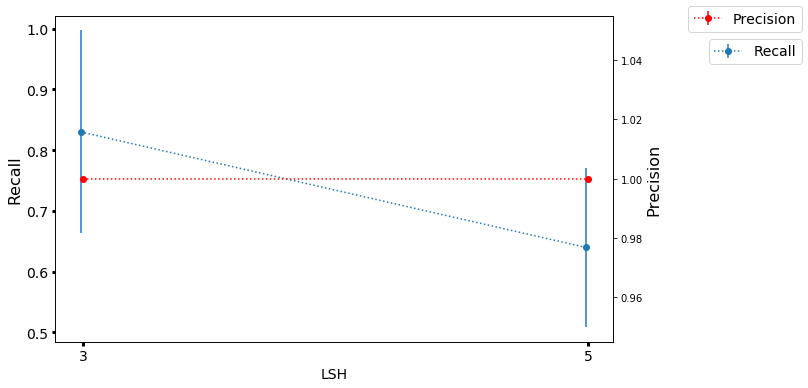

In [82]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

fig, ax = plt.subplots(figsize=(10,6))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [df200_B10.Recall_mean.values[0], df200_B10.Recall_mean.values[1]]
e = [df200_B10.Recall_1SE.values[0],df200_B10.Recall_1SE.values[1]]

y2 = [df200_B10.Precision_mean.values[0], df200_B10.Precision_mean.values[1]]
e2 = [df200_B10.Prec_1SE.values[0],df200_B10.Prec_1SE.values[1]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.35, 0.95), fontsize=14)
ax2.legend(bbox_to_anchor=(1.35, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

In [83]:
df200_B10.columns

Index(['MH', 'LSH', 'band', 'TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE',
       'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE', 'Accuracy_mean', 'Acc_1SE',
       'Precision_mean', 'Prec_1SE', 'Recall_mean', 'Recall_1SE', 'F1_mean',
       'F1_1SE', 'SIM_t'],
      dtype='object')

In [84]:
df3=df200_B10[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE','FN_mean','FN_1SE']]
df3

,LSH,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE
0,3,2.0,0.0,499497.5,0.500,0.0,0.0,0.5,0.500
0,5,2.0,0.0,499496.5,0.645,0.0,0.0,1.5,0.645


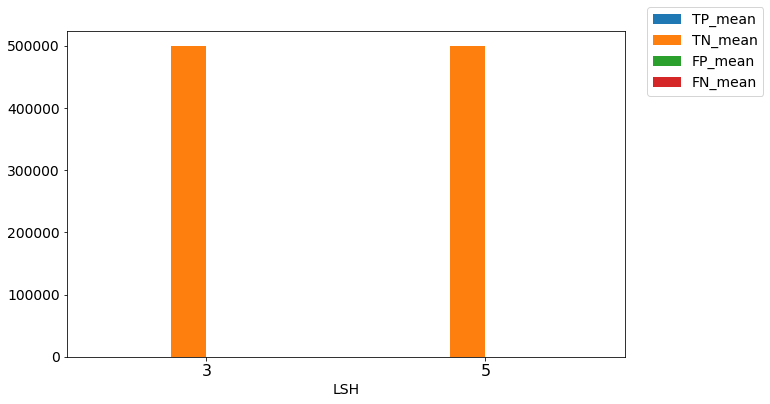

In [85]:
#MH200 bands 10

x=['3','5']
df3=df200_B10[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE','FN_mean','FN_1SE']]
df4=df3.set_index('LSH')
#MSH 200 bands 
matplotlib.rcParams.update({'font.size': 14})
# df4[['TP_mean', 'TN_mean', 'FP_mean', 'FN_mean']].plot(kind='bar', yerr=df4[['TP_1SE', 'TN_1SE', 'FP_1SE', 'FN_1SE']].values.T,color= ['blue', 'red', 'green', 'orange'] , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(10,6))
# plt.legend(loc=(1.04,0.8))
# plt.xticks(fontsize=16)

df4[['TP_mean', 'TN_mean', 'FP_mean', 'FN_mean']].plot(kind='bar', yerr=df4[['TP_1SE', 'TN_1SE', 'FP_1SE', 'FN_1SE']].values.T, rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(10,6))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

In [86]:
res200LSH1LSH3LSH5.to_csv('MH200LSH1LSH2LSH3_1.csv')

In [87]:
#MH200 bands 50
df=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(50)]
df

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,50,36.0,9.236,467786.6,402.142,0.0,0.000,31677.4,399.884,0.94,0.001,1.00,0.000,0.00,0.000,0.00,0.001,0.376
0,200,3,50,2539.4,171.713,466499.8,1209.553,228.6,30.276,30232.2,1080.198,0.94,0.002,0.92,0.011,0.08,0.003,0.14,0.005,0.376
0,200,5,50,18366.2,662.229,446175.4,2694.977,23838.4,1931.082,11120.0,208.277,0.93,0.004,0.44,0.013,0.62,0.005,0.51,0.009,0.376


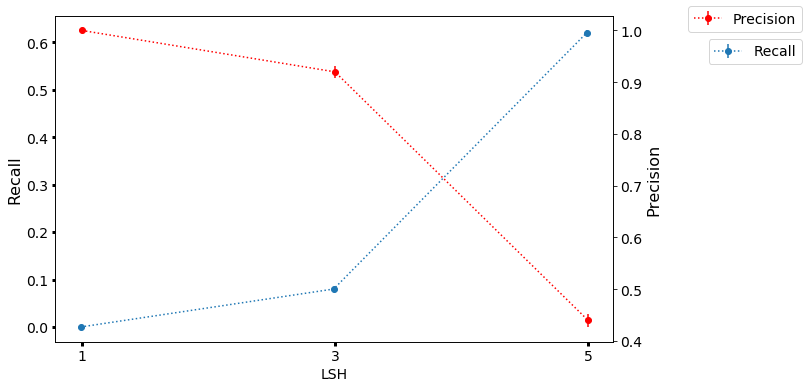

In [88]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

fig, ax = plt.subplots(figsize=(10,6))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [df.Recall_mean.values[0], df.Recall_mean.values[1], df.Recall_mean.values[2]]
e = [df.Recall_1SE.values[0],df.Recall_1SE.values[1],df.Recall_1SE.values[2]]

y2 = [df.Precision_mean.values[0], df.Precision_mean.values[1], df.Precision_mean.values[2]]
e2 = [df.Prec_1SE.values[0],df.Prec_1SE.values[1],df.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.35, 0.95), fontsize=14)
ax2.legend(bbox_to_anchor=(1.35, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

In [89]:
a=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(100)]
a

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,100,66253.5,1716.090,146863.25,1855.119,80.0,10.501,286303.25,1862.122,0.43,0.004,1.0,0.000,0.19,0.005,0.32,0.006,0.1
0,200,3,100,339339.0,2268.604,103680.60,2307.697,38956.2,1341.834,17524.20,1093.083,0.89,0.001,0.9,0.003,0.95,0.003,0.92,0.001,0.1
0,200,5,100,334818.8,3515.800,109162.20,2946.325,35509.0,1829.659,20010.00,1529.938,0.89,0.002,0.9,0.004,0.94,0.004,0.92,0.002,0.1


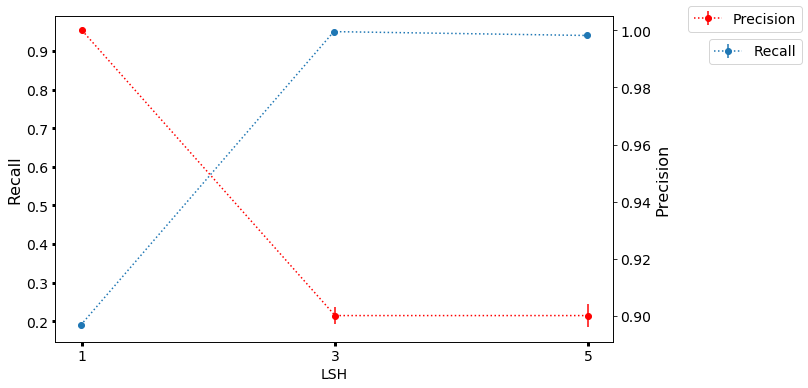

In [90]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

fig, ax = plt.subplots(figsize=(10,6))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [a.Recall_mean.values[0], a.Recall_mean.values[1], a.Recall_mean.values[2]]
e = [a.Recall_1SE.values[0], a.Recall_1SE.values[1],a.Recall_1SE.values[2]]

y2 = [a.Precision_mean.values[0], a.Precision_mean.values[1], a.Precision_mean.values[2]]
e2 = [a.Prec_1SE.values[0],a.Prec_1SE.values[1],a.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=16)
ax2.set_ylabel('Precision',fontsize=16)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.35, 0.95), fontsize=14)
ax2.legend(bbox_to_anchor=(1.35, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

In [91]:
#MH200 bands 20
df2=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(20)]
df2

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,200,1,20,2.0,0.000,499420.4,4.377,0.0,0.000,77.6,4.377,1.0,0.0,1.00,0.000,0.03,0.002,0.05,0.003,0.741
0,200,3,20,2.0,0.000,499425.8,3.720,0.0,0.000,72.2,3.720,1.0,0.0,1.00,0.000,0.03,0.001,0.05,0.003,0.741
0,200,5,20,10.6,1.288,499424.2,2.800,1.6,0.245,63.6,2.064,1.0,0.0,0.87,0.015,0.14,0.014,0.24,0.020,0.741


In [92]:
#MH200 bands 100
df1=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(100)]
x=['1','3','5']
df3=df1[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE']]
df4=df3.set_index('LSH')

In [93]:
res200LSH1LSH3LSH5.columns

Index(['MH', 'LSH', 'band', 'TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE',
       'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE', 'Accuracy_mean', 'Acc_1SE',
       'Precision_mean', 'Prec_1SE', 'Recall_mean', 'Recall_1SE', 'F1_mean',
       'F1_1SE', 'SIM_t'],
      dtype='object')

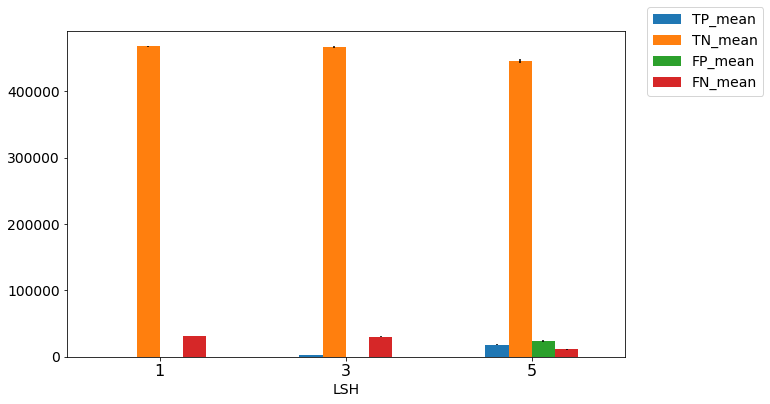

In [94]:
#MSH 200 bands 50
df=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(50)]
x=['1','3','5']
df3=df[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df4=df3.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df4[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df4[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(10,6))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()

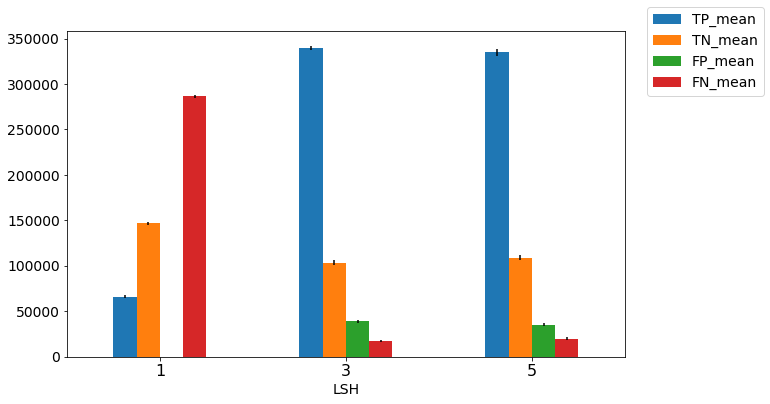

In [95]:
#MSH 200 bands 100
df=res200LSH1LSH3LSH5[res200LSH1LSH3LSH5.band.eq(100)]
x=['1','3','5']
df3=df[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df4=df3.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df4[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df4[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(10,6))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()


## MH600

In [96]:
res600LSH5LSH3LSH1

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.60,2758.482,80139.40,327.885,18.40,8.687,291872.60,2866.687,0.42,0.006,1.00,0.000,0.300000,0.007000,0.470000,0.008000,0.058
1,600,1,200,2451.00,160.851,265795.00,1666.826,0.20,0.200,231253.80,1587.064,0.54,0.003,1.00,0.000,0.010479,0.000654,0.020738,0.001280,0.171
2,600,1,150,77.80,6.719,414433.60,1347.672,0.00,0.000,84988.60,1350.253,0.83,0.003,1.00,0.000,0.000917,0.000085,0.001833,0.000170,0.286
3,600,1,100,2.20,0.200,490812.20,277.088,0.00,0.000,8685.60,277.080,0.98,0.001,1.00,0.000,0.000254,0.000023,0.000508,0.000047,0.464
4,600,1,50,2.00,0.000,499407.60,1.720,0.00,0.000,90.40,1.720,1.00,0.000,1.00,0.000,0.021675,0.000405,0.042429,0.000775,0.722
5,600,1,30,2.00,0.000,499493.50,0.645,0.00,0.000,4.50,0.645,1.00,0.000,1.00,0.000,0.320000,0.032000,0.480000,0.037000,0.844
6,600,3,300,410194.00,1614.392,59155.80,1877.955,20037.60,1740.122,10112.60,1451.379,0.94,0.001,0.95,0.004,0.980000,0.003000,0.960000,0.001000,0.058
7,600,3,200,213350.80,992.707,206171.80,3163.943,62670.40,3906.789,17307.00,886.796,0.84,0.006,0.77,0.011,0.930000,0.004000,0.840000,0.005000,0.171
8,600,3,150,6250.20,360.166,414661.40,634.486,131.40,22.787,78457.00,539.885,0.84,0.001,0.98,0.002,0.070000,0.004000,0.140000,0.007000,0.286
9,600,3,100,352.75,33.510,491383.50,308.381,23.25,7.341,7740.50,273.324,0.98,0.001,0.94,0.016,0.040000,0.003000,0.080000,0.005000,0.464


In [97]:
df300=res600LSH5LSH3LSH1[res600LSH5LSH3LSH1.band.eq(300)]
df300

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
0,600,1,300,127469.6,2758.482,80139.4,327.885,18.4,8.687,291872.6,2866.687,0.42,0.006,1.00,0.000,0.30,0.007,0.47,0.008,0.058
6,600,3,300,410194.0,1614.392,59155.8,1877.955,20037.6,1740.122,10112.6,1451.379,0.94,0.001,0.95,0.004,0.98,0.003,0.96,0.001,0.058
0,600,5,300,409038.0,1143.087,61052.0,828.409,18521.0,781.600,10889.0,824.930,0.94,0.001,0.96,0.002,0.97,0.002,0.97,0.001,0.058


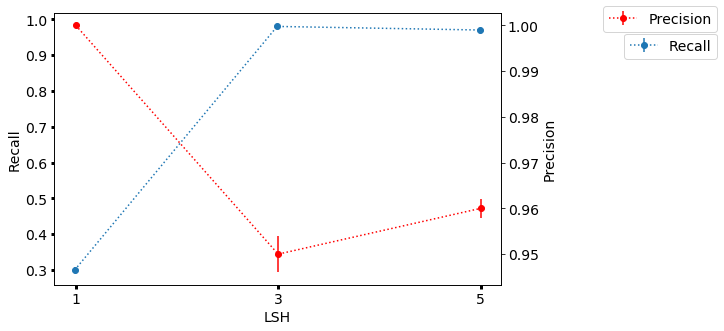

In [98]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [df300.Recall_mean.values[0], df300.Recall_mean.values[1], df300.Recall_mean.values[2]]
e = [df300.Recall_1SE.values[0], df300.Recall_1SE.values[1], df300.Recall_1SE.values[2]]

y2 = [df300.Precision_mean.values[0], df300.Precision_mean.values[1], df300.Precision_mean.values[2]]
e2 = [df300.Prec_1SE.values[0], df300.Prec_1SE.values[1], df300.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=14)
ax2.set_ylabel('Precision',fontsize=14)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.95), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

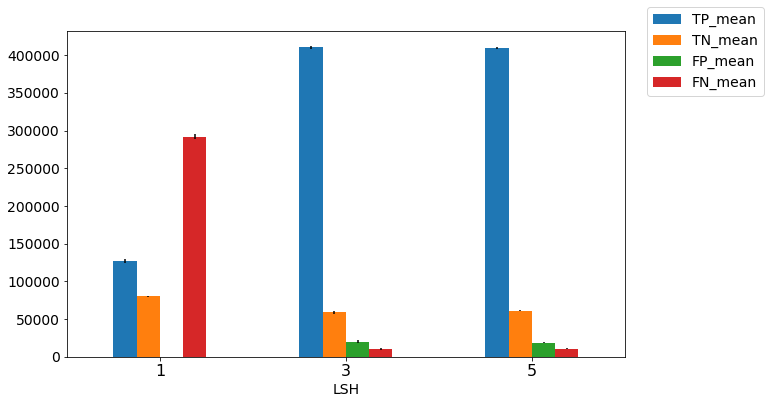

In [99]:
#MSH 600 bands 300
df=res600LSH5LSH3LSH1[res600LSH5LSH3LSH1.band.eq(300)]
x=['1','3','5']
df3=df[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df4=df3.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df4[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df4[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(10,6))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()


In [100]:
MH600B200=res600LSH5LSH3LSH1[res600LSH5LSH3LSH1.band.eq(200)]
MH600B200

,MH,LSH,band,TP_mean,TP_1SE,TN_mean,TN_1SE,FP_mean,FP_1SE,FN_mean,FN_1SE,Accuracy_mean,Acc_1SE,Precision_mean,Prec_1SE,Recall_mean,Recall_1SE,F1_mean,F1_1SE,SIM_t
1,600,1,200,2451.0,160.851,265795.00,1666.826,0.2,0.200,231253.80,1587.064,0.54,0.003,1.00,0.000,0.010479,0.000654,0.020738,0.00128,0.171
7,600,3,200,213350.8,992.707,206171.80,3163.943,62670.4,3906.789,17307.00,886.796,0.84,0.006,0.77,0.011,0.930000,0.004000,0.840000,0.00500,0.171
0,600,5,200,210291.0,1122.959,216704.57,594.848,51404.0,1152.937,21100.43,733.962,0.85,0.001,0.80,0.004,0.910000,0.003000,0.850000,0.00200,0.171


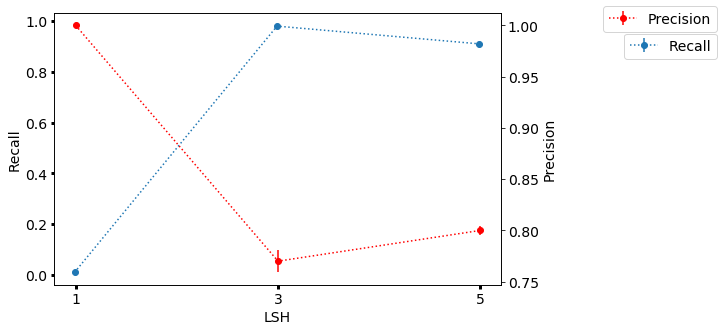

In [101]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
df200=MH600B200

fig, ax = plt.subplots(figsize=(8,5))

# get handles
handles, labels = ax.get_legend_handles_labels()

x=['1','3','5']

trans1 = Affine2D().translate(-0.005, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.005, 0.0) + ax.transData

y= [df200.Recall_mean.values[0], df300.Recall_mean.values[1], df200.Recall_mean.values[2]]
e = [df200.Recall_1SE.values[0], df300.Recall_1SE.values[1], df200.Recall_1SE.values[2]]

y2 = [df200.Precision_mean.values[0], df200.Precision_mean.values[1], df200.Precision_mean.values[2]]
e2 = [df200.Prec_1SE.values[0], df200.Prec_1SE.values[1], df200.Prec_1SE.values[2]]

er = ax.errorbar(x, y, yerr=e, marker="o", linestyle='dotted', transform=trans1, label='Recall')

ax2 = ax.twinx()  

er2 = ax2.errorbar(x, y2, yerr=e2, marker="o", linestyle="dotted", color='r', label='Precision')

ax.set_ylabel('Recall',fontsize=14)
ax2.set_ylabel('Precision',fontsize=14)
ax.set_xlabel('LSH',fontsize=14)
ax.legend(bbox_to_anchor=(1.5, 0.95), fontsize=14)
ax2.legend(bbox_to_anchor=(1.5, 1.05), fontsize=14)
ax.tick_params(labelcolor='black', labelsize=14, width=3)
plt.show()

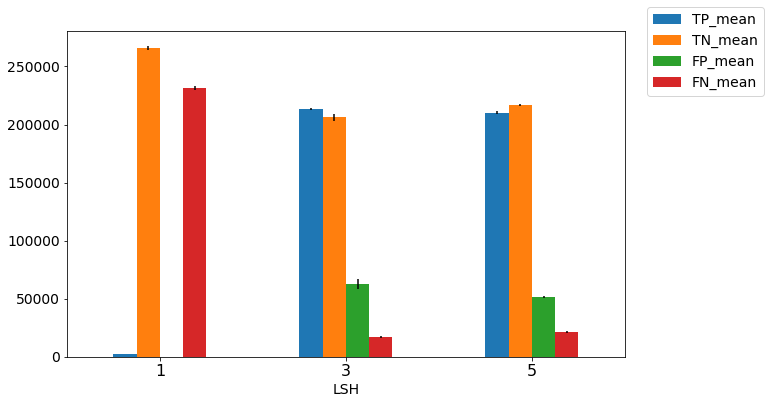

In [102]:
#MSH 600 bands 200
x=['1','3','5']
df3=MH600B200[['LSH','TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE', 'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE']]
df4=df3.set_index('LSH')
matplotlib.rcParams.update({'font.size': 14})
df4[['TP_mean', 'TN_mean','FP_mean', 'FN_mean']].plot(kind='bar', yerr=df4[['TP_1SE', 'TN_1SE','FP_1SE','FN_1SE']].values.T , rot=0, alpha = 1,error_kw=dict(ecolor='k'), figsize=(10,6))
plt.legend(loc=(1.04,0.8))
plt.xticks(fontsize=16)

plt.show()


In [103]:
res600LSH5LSH3LSH1.columns

Index(['MH', 'LSH', 'band', 'TP_mean', 'TP_1SE', 'TN_mean', 'TN_1SE',
       'FP_mean', 'FP_1SE', 'FN_mean', 'FN_1SE', 'Accuracy_mean', 'Acc_1SE',
       'Precision_mean', 'Prec_1SE', 'Recall_mean', 'Recall_1SE', 'F1_mean',
       'F1_1SE', 'SIM_t'],
      dtype='object')

In [104]:
res600LSH5LSH3LSH1.band.unique()

array([300, 200, 150, 100,  50,  30], dtype=int64)